# Задание 2
## Вариант 15
## Дылкин Даниил 301гр

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import math

Задаем условия задачи.

In [5]:
c2 = 0.80
A = -2
B = 3.0
C = -1
y1_0, y2_0, y3_0, y4_0 = 1, 1, A, 1
x_ab = [0, 5] # промежуток

In [6]:
a21 = 4/5 # мы нашли эти числа для метода
b1 = 3/8
b2 = 5/8

## Условия:
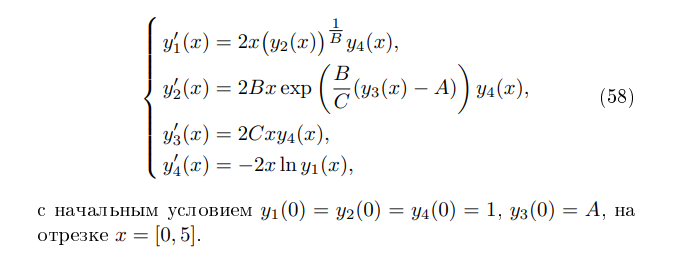

In [15]:
def f1(x, y2, y4):
    return 2 * x * y2 **(1 / B) * y4 # заменить на 1 / B

def f2(x, y3, y4):
    return 2 * B * x * np.exp((B / C) * (y3 - A)) * y4

def f3(x, y4):
    return 2 * C * x * y4

def f4(x, y1):
    return -2 * x * np.log(y1) # поставить ограничение, и глянут что будет

In [8]:
def y1_true(x):
    return np.exp(np.sin(x ** 2))

def y2_true(x):
    return np.exp(B * np.sin(x ** 2))

def y3_true(x):
    return C * np.sin(x ** 2) + A

def y4_true(x):
    return np.cos(x ** 2)

# Двухэтапный метод Рунге-Кутты

## Коэффиценты:  
\begin{equation*}
    \begin{cases}
        k_{11} = f_1(x, y_2, y_4) \cdot h \\
        k_{21} = f_2(x, y_3, y_4) \cdot h \\
        k_{31} = f_3(x, y_4) \cdot h \\
        k_{41} = f_4(x, y_1) \cdot h \\
    \end{cases}
\end{equation*} 

\begin{equation*}
    \begin{cases}
        k_{12} = f_1(x + c_2h, y_2 + a_{21}k_{21}, y_4 + a_{21}k_{41}) \cdot h  \\
        k_{22} = f_2(x + c_2h, y_3 + a_{21}k_{31},  y_4 + a_{21}k_{41})  \cdot h \\
        k_{32} = f_3(x + c_2h, y_4 + a_{21}k_{41}) \cdot h  \\
        k_{42} = f_4(x + c_2h, y_1 + a_{21}k_{11}) \cdot h  \\
    \end{cases}
\end{equation*}

Мы вычилсяем коэффиценты в точке $(x, y_1, y_2, y_3, y_4)$, которая для первого шага равна: $(0, 1, 1, -2, 1)$. Далее мы из точки $x=0$ движимся в точку $x=5$ с шагом $h$. Коэффиценты $y_i$ при этом вычисляем как:
$$
\begin{equation*}
    \begin{cases}
        y_1(x+h) = y_1 + b_1k_{11} + b_2k_{12} \\
        y_2(x+h) = y_2 + b_1k_{21} + b_2k_{22} \\
        y_3(x+h) = y_3 + b_1k_{31} + b_2k_{32} \\
        y_4(x+h) = y_4 + b_1k_{41} + b_2k_{42} \\
    \end{cases}
\end{equation*}
$$

Алгорим, с заданным шагом:

In [9]:
def runge_kutta2(x_ab, h, f1, f2, f3, f4):
    pos = np.arange(x_ab[0], x_ab[1] + h/2, h) # Разбиваем наш интервал на сетку
    
    y1 = np.ones(len(pos)) # задаем начальные значения yi
    y2 = np.ones(len(pos))
    y3 = np.ones(len(pos))
    y4 = np.ones(len(pos))
    y3[0] = A
    
    for i in range(len(pos) - 1):  # далее идут формулы, которые выше
        k11 = f1(pos[i], y2[i], y4[i]) * h
        k21 = f2(pos[i], y3[i], y4[i]) * h
        k31 = f3(pos[i], y4[i]) * h
        k41 = f4(pos[i], y1[i]) * h  
        
        k12 = f1(pos[i] + c2 * h, y2[i] + a21 * k21, y4[i] + a21 * k41) * h  
        k22 = f2(pos[i] + c2 * h, y3[i] + a21 * k31, y4[i] + a21 * k41) * h 
        k32 = f3(pos[i] + c2 * h, y4[i] + a21 * k41) * h 
        k42 = f4(pos[i] + c2 * h, y1[i] + a21 * k11) * h 
        
        y1[i + 1] = y1[i] + b1 * k11 + b2 * k12
        y2[i + 1] = y2[i] + b1 * k21 + b2 * k22
        y3[i + 1] = y3[i] + b1 * k31 + b2 * k32 
        y4[i + 1] = y4[i] + b1 * k41 + b2 * k42 
    
    return y1, y2, y3, y4

Проверим, как работает наш метод с шагом 0.001

In [45]:
%%time
y1, y2, y3, y4 = runge_kutta2(x_ab, 1/128, f1, f2, f3, f4)

Wall time: 26 ms


Text(0, 0.5, 'y')

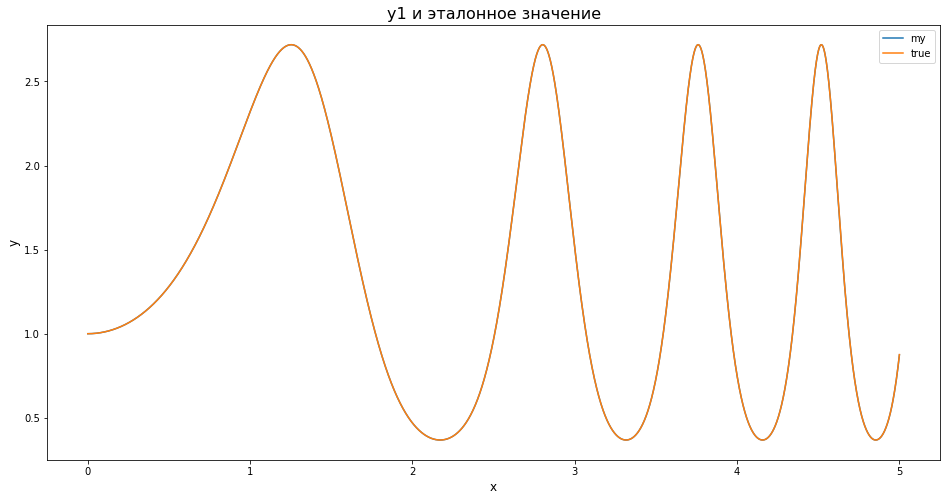

In [11]:
plt.figure(figsize=(16, 8))

pos = np.linspace(x_ab[0], x_ab[1], len(y1))

y_tr = y1_true(pos)

plt.title('y1 и эталонное значение', fontsize=16) 

plt.plot(pos, y1, label='my')
plt.plot(pos, y_tr, label='true')
plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

Как видим, графики практически совпадают. Выведем погрешность метода как по формуле $-log_{10}(|y_i - \bar{y_i}|)$, где $\bar{y_i}$ это точное значение, которое мы можем вычислить, тк знаем решение нашей системы.

In [12]:
def plot_loss(y1, y2, y3, y4, pos=None, N=-1, skip=1, view='all', grid=True): # вспомогательная функция для построения графика
    if N == -1:
        N = len(y1) - 1
    if pos is None:
        pos = np.linspace(x_ab[0], x_ab[1], len(y1))

        
    y_tr1 = y1_true(pos)
    y_tr2 = y2_true(pos)
    y_tr3 = y3_true(pos)
    y_tr4 = y4_true(pos)

    loss1 = [-np.log10(np.clip(np.abs(y1[i] - y_tr1[i]), 1e-17, np.inf)) for i in range(0, N, skip)]
    loss2 = [-np.log10(np.clip(np.abs(y2[i] - y_tr2[i]), 1e-17, np.inf)) for i in range(0, N, skip)]
    loss3 = [-np.log10(np.clip(np.abs(y3[i] - y_tr3[i]), 1e-17, np.inf)) for i in range(0, N, skip)]
    loss4 = [-np.log10(np.clip(np.abs(y4[i] - y_tr4[i]), 1e-17, np.inf)) for i in range(0, N, skip)]

    xs = np.linspace(1, 5, len(loss1))

    plt.figure(figsize=(16, 8))

    plt.title('Оценка погрешности', fontsize=16)

    if view == 'all':
        plt.plot(xs, loss1, label='y1')
        plt.plot(xs, loss2, label='y2')
        plt.plot(xs, loss3, label='y3')
        plt.plot(xs, loss4, label='y4')
    elif view == 'mean':
        loss = np.mean([loss1, loss2, loss3, loss4], axis=0)
        plt.plot(xs, loss, label='mean loss')
    elif view == 'median':
        loss = np.median([loss1, loss2, loss3, loss4], axis=0)
        plt.plot(xs, loss, label='median loss')
    elif view == 'min':
        loss = np.min([loss1, loss2, loss3, loss4], axis=0)
        plt.plot(xs, loss, label='min loss')
    elif view == 'max':
        loss = np.max([loss1, loss2, loss3, loss4], axis=0)
        plt.plot(xs, loss, label='max loss')
    elif view == 'norm': # пока не работает
        loss = np.linalg.norm([loss1, loss2, loss3, loss4], axis=0)
        plt.plot(xs, loss, label='max loss')
    
    plt.legend(loc='best')
    if grid:
        plt.grid()
    plt.xlabel('n', fontsize=12)
    plt.ylabel('-log10(y-etalon)', fontsize=12)

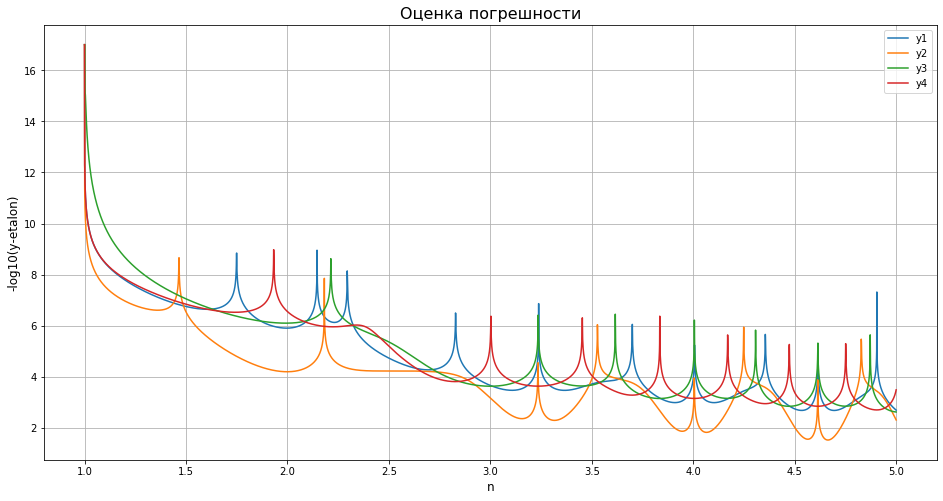

In [13]:
plot_loss(y1, y2, y3, y4)

Мы видим, что точность колеблится около двух знаков. Скачки обьясняются тем, что когда функция ведет себя полого, то производные $p+1$ порядка (где $p$ - это порядок нашего метода. Тут $p=2$), которые входят в локальную погрешность, тоже невелики, и тк мы считаем с постоянным шагом, то то и дело натыкаемся на интервалы, где повышается точность.

Немного уменьшим шаг, и посмотрим как отрабатывает наш метод

Wall time: 3.12 s


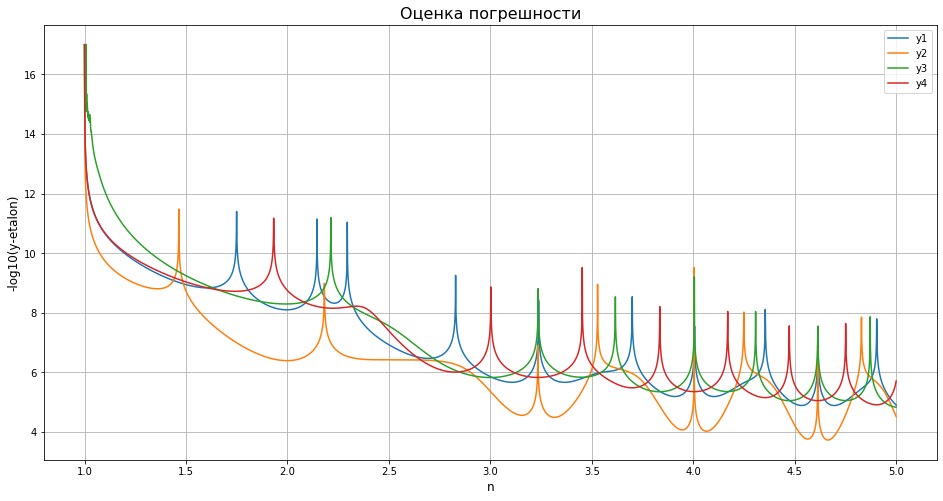

In [14]:
%%time
y1, y2, y3, y4 = runge_kutta2(x_ab, 8e-5, f1, f2, f3, f4)
plot_loss(y1, y2, y3, y4, skip=10)

Wall time: 2.88 s


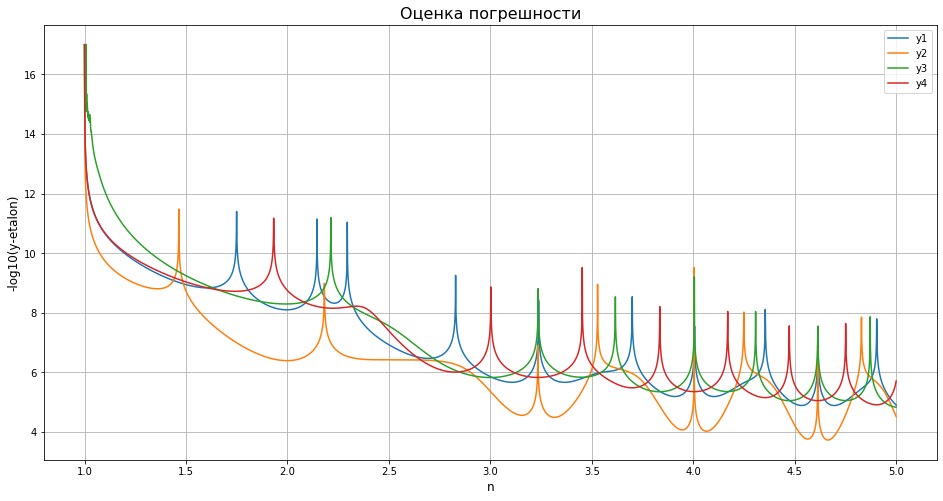

In [47]:
%%time
y1, y2, y3, y4 = runge_kutta2(x_ab, 8e-5, f1, f2, f3, f4)
plot_loss(y1, y2, y3, y4, skip=10)

Довольно неплохо. Давайте посмотрим как ведет себя средняя, и минимальная и максимальная погрешности:

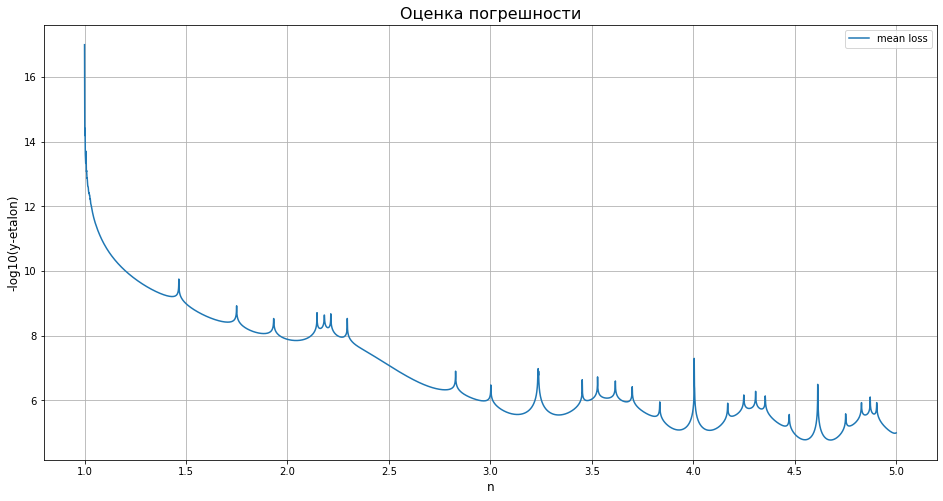

In [12]:
plot_loss(y1, y2, y3, y4, skip=10, view='mean')

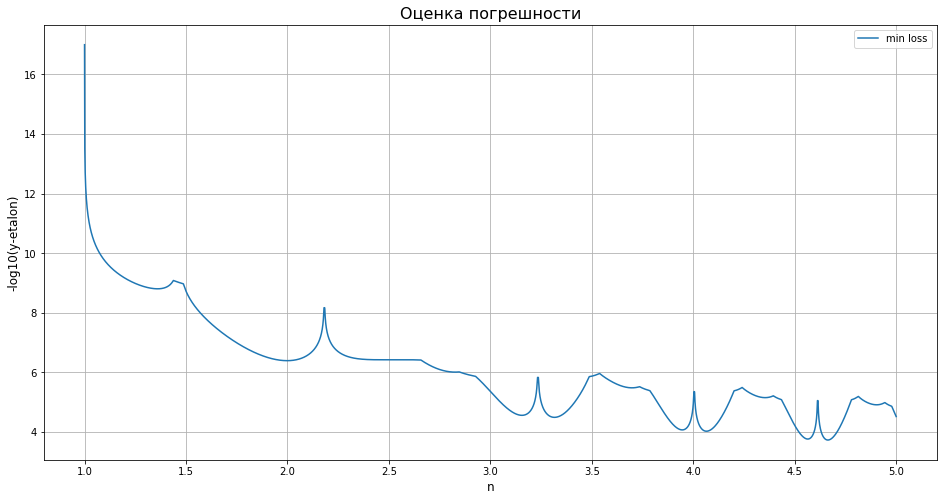

In [13]:
plot_loss(y1, y2, y3, y4, skip=10, view='min')

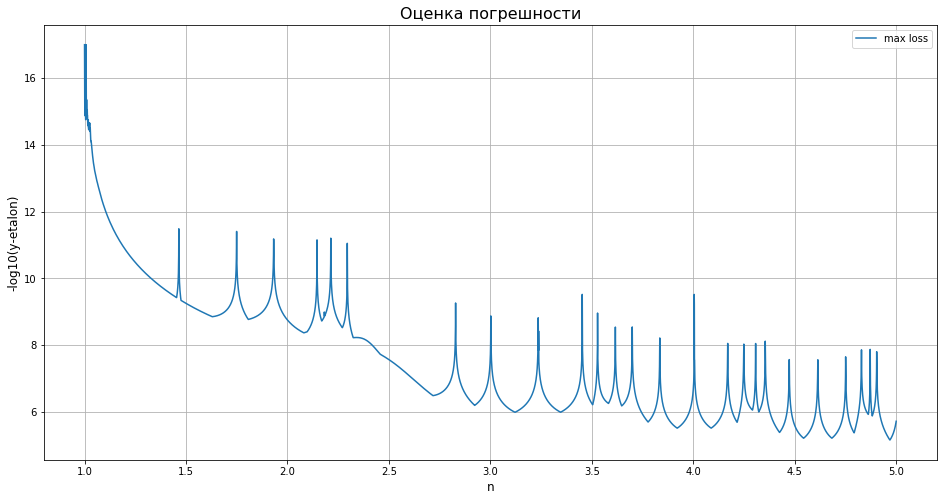

In [14]:
plot_loss(y1, y2, y3, y4, skip=10, view='max')

Как видим, средняя погрешность отличается от минимальной на целую единицу. Это наводит нас на мысль, что если нам категорически не нужно выходить из некоторго заданного значения нашей точности, то нужно отдельно оценивать каждую погрешность. Но сначала разберемся, как оценивают погрешность.

## Метод Рунге оценки полной погрешности

Идея аналогична оценки погрешности в ИКФ. Строим две связынные сетки. Тогда их погрешности, при достаточно малом шаге будут выглядеть как:

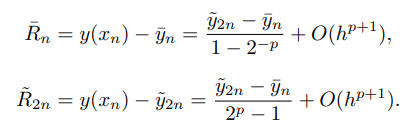

Откуда мы сможем выразить шаг, который будет допустимым для нашей заданной допустимой погрешности:
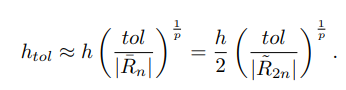

Для нашего метода $p=2$

In [15]:
def glob_tol(x_ab, h, f1, f2, f3, f4, tol=1e-4, L=2, p=2):
    y_n1, y_n2, y_n3, y_n4 = runge_kutta2(x_ab, h, f1, f2, f3, f4) # запускаем метод с шагом h
    y_2n1, y_2n2, y_2n3, y_2n4 = runge_kutta2(x_ab, h / L, f1, f2, f3, f4) # запускаем метод с шагом h / 2
    number = -1 # смотрим на последний элемент. По нему мы и будем оценивать
    
    y_n = np.array([y_n1[number], y_n2[number], y_n3[number], y_n4[number]])
    y_2n = np.array([y_2n1[number], y_2n2[number], y_2n3[number], y_2n4[number]])
    
    R1 = (y_2n - y_n) / (1 - 2 ** (-p)) # Считаем погрешность на первой сетке и на второй
    R2 = (y_2n - y_n) / (2 ** p - 1)
    
    if np.linalg.norm(R1) < tol:
        return h, R1, R2
    elif np.linalg.norm(R2) < tol:
        return h / L, R1, R2
    else:
        h_tol = h * (tol / np.linalg.norm(R1)) ** (1 / p) # Считаем шаг, который обеспечит заданную точность
        return glob_tol(x_ab, h_tol, f1, f2, f3, f4, tol, L, p)
    

In [16]:
h_tol, _, _ = glob_tol(x_ab, 0.28, f1, f2, f3, f4, tol=1e-2)
h_tol

0.0003310166821169239

In [17]:
np.linalg.norm([1,2,3,4])

5.477225575051661

In [41]:
h_tol, _, _ = glob_tol(x_ab, 1e-2, f1, f2, f3, f4, tol=1e-4)
h_tol

2.716784520709345e-05

Как мы видим, шаг довольно мал. Это происходит по тому, что мы ориентируемся на погрешность на "крутых" склонах нашей функции. Но, как мы знаем, есть промежутки, где функция ведет себя достаточно полого, и вычисления с малым шагом будет нецелесообразно на этих участках. Это наводит нас на мысль оценки, так называемой, локальной погрешности. Мы будем проводить наши вычисления на несколько шагов вперед на двух связаных сетках, и смотреть, какой шаг нам выбрать в данный момент.

Посмотрим, что будет если мы проведем вычисления с таким шагом

In [38]:
%%time
y1, y2, y3, y4 = runge_kutta2(x_ab, h_tol, f1, f2, f3, f4)

Wall time: 7.79 s


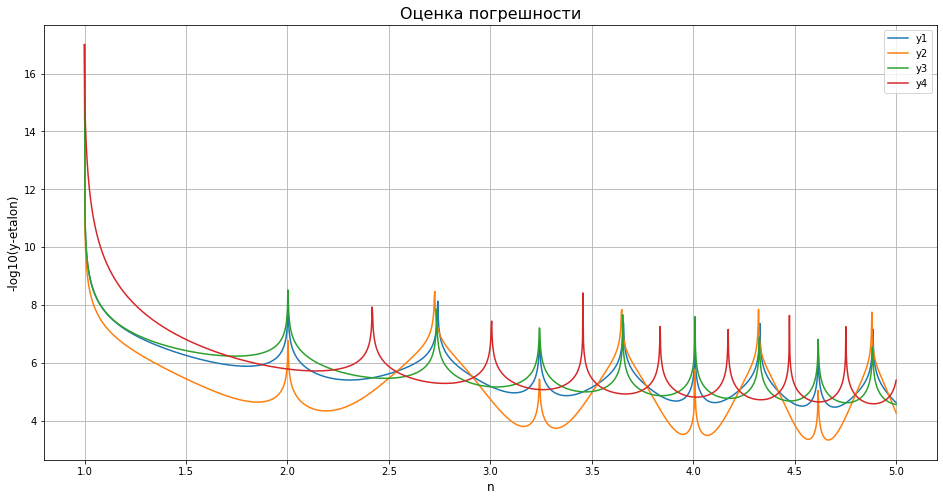

In [39]:
plot_loss(y1, y2, y3, y4, skip=100)

Видим, что метод долго работал и дал нужную точность.

В оценке локальной погрешности непонятно какой делать шаг. Предыдущий, с которым ходили или с постоянным?

In [48]:
def local_runge2(x_ab, h, f1, f2, f3, f4, tol=1e-4, L=2, p=2, n=4): # n- количество шагов на которых мы считаем.
    # h = max_h  # Постоянный шаг.
    y_n1, y_n2, y_n3, y_n4 = runge_kutta2([x_ab[0], x_ab[0] + n * h], h, f1, f2, f3, f4) # шагаем на несколько шагов вперед
    y_2n1, y_2n2, y_2n3, y_2n4 = runge_kutta2([x_ab[0], x_ab[0] + n * h], h / L, f1, f2, f3, f4) #(на n шагов)
    
    y_n = np.array([y_n1[-1], y_n2[-1], y_n3[-1], y_n4[-1]])
    y_2n = np.array([y_2n1[-1], y_2n2[-1], y_2n3[-1], y_2n4[-1]])
    
    R1 = (y_2n - y_n) / (1 - 2 ** (-p)) # оцениваем локальную погрешность
    R2 = (y_2n - y_n) / (2 ** p - 1)
    
    if np.linalg.norm(R1) < tol:
        return h, R1, R2
    elif np.linalg.norm(R2) < tol:
        return h / L, R1, R2
    else:
        h_tol = h * (tol / np.linalg.norm(R1)) ** (1 / p) # Считаем шаг, который обеспечит заданную точность
        return local_runge2(x_ab, h_tol, f1, f2, f3, f4, tol, L, p, n)

In [49]:
local_runge2(x_ab, 1e-3, f1, f2, f3, f4, 1e-14)

(1.5447196351986157e-05,
 array([ 1.18423789e-15,  8.88178420e-16, -1.77635684e-15,  0.00000000e+00]),
 array([ 2.96059473e-16,  2.22044605e-16, -4.44089210e-16,  0.00000000e+00]))

Возникает небольшая проблема. На некоторых участках мы можем брать довольно большой шаг, но тогда могут возникнуть проблемы с вычислением логарифма. Поэтому не будем брать шаг меньше чем 1е-3

Теперь немного оптимизируем наш метод. На каждом шаге будем вычилсять локальную погрешность нашей функции, и выбирать новый, подходящий шаг

In [80]:
def r_rk2(x_ab, h, f1, f2, f3, f4, tol=0.01, L=2, p=2, n=4):
    # Нам нужно будет возращать и сетку по которой мы считали.
    y1 = [1]# потом обобщить
    y2 = [1]
    y3 = [A]
    y4 = [1]
    hs = [h]
    pos = [x_ab[0]]
    i = 0
    h_tol = h
    while pos[-1] < x_ab[1]: # пока мы не дошли до конца
        h_tol, _, _ = local_runge2([pos[-1], x_ab[1]], h_tol, f1, f2, f3, f4, tol=tol, L=L, p=p, n=n) # вычисляем локальную погрешность
        
        if pos[-1] + h_tol > x_ab[1]: # чтобы попасть точно в конце промежутка.
            h_tol = x_ab[1] - pos[-1]
        
        k11 = f1(pos[-1], y2[i], y4[i]) * h_tol
        k21 = f2(pos[-1], y3[i], y4[i]) * h_tol
        k31 = f3(pos[-1], y4[i]) * h_tol
        k41 = f4(pos[-1], y1[i]) * h_tol
        
        k12 = f1(pos[-1] + c2 * h_tol, y2[i] + a21 * k21, y4[i] + a21 * k41) * h_tol 
        k22 = f2(pos[-1] + c2 * h_tol, y3[i] + a21 * k31, y4[i] + a21 * k41) * h_tol
        k32 = f3(pos[-1] + c2 * h_tol, y4[i] + a21 * k41) * h_tol
        k42 = f4(pos[-1] + c2 * h_tol, y1[i] + a21 * k11) * h_tol

        y1.append(y1[i] + b1 * k11 + b2 * k12)  
        y2.append(y2[i] + b1 * k21 + b2 * k22)
        y3.append(y3[i] + b1 * k31 + b2 * k32)
        y4.append(y4[i] + b1 * k41 + b2 * k42) 
        pos.append(pos[-1] + h_tol)
        hs.append(h_tol)
        i += 1
    
    return y1, y2, y3, y4, np.array(pos), hs

In [83]:
%%time
y1, y2, y3 ,y4, pos, hs= r_rk2(x_ab, 1e-4, f1, f2, f3, f4, tol=1e-6, n=4)

Wall time: 31.3 s


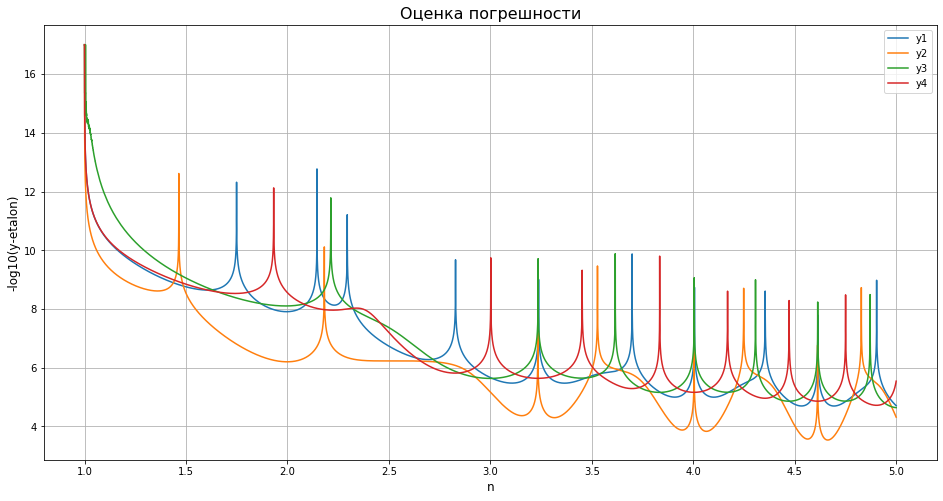

In [84]:
plot_loss(y1, y2, y3 ,y4, pos)

Text(0, 0.5, 'y')

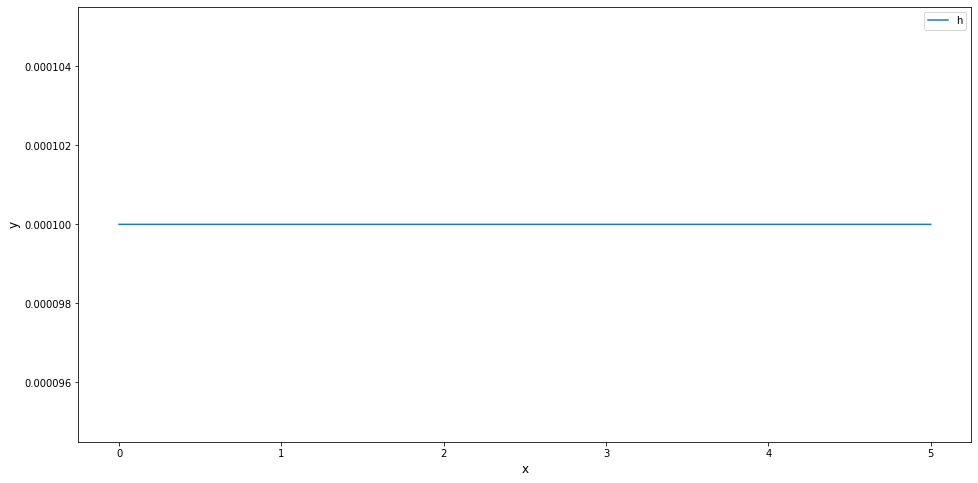

In [87]:
plt.figure(figsize=(16, 8))

plt.plot(pos[:-1], hs[:-1], label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

In [86]:
np.unique(hs)

array([9.99999983e-05, 1.00000000e-04])

Метод отработал, но не дал ожидаемых результатов. Ниже мы видим, что значение всегда было около порога. Так будет и если менять минимально допустимую длину шага

In [23]:
np.unique(hs)

array([9.99999983e-05, 1.00000000e-04])

Шаг сходится к нашему максимально допустимому значению. И возможно из-за того, что мы считаем с нужным шагом все и ломается

Зададим немного другие условия, и посмотрим как меняется ответ в зависимости от количества количества шагов, которые мы делаем при оценке локальной погрешности

In [24]:
%%time
y1, y2, y3 ,y4, pos, hs = r_rk2(x_ab, 0.028, f1, f2, f3, f4, tol=1e-4, p=2, n=30)

Wall time: 4min 2s


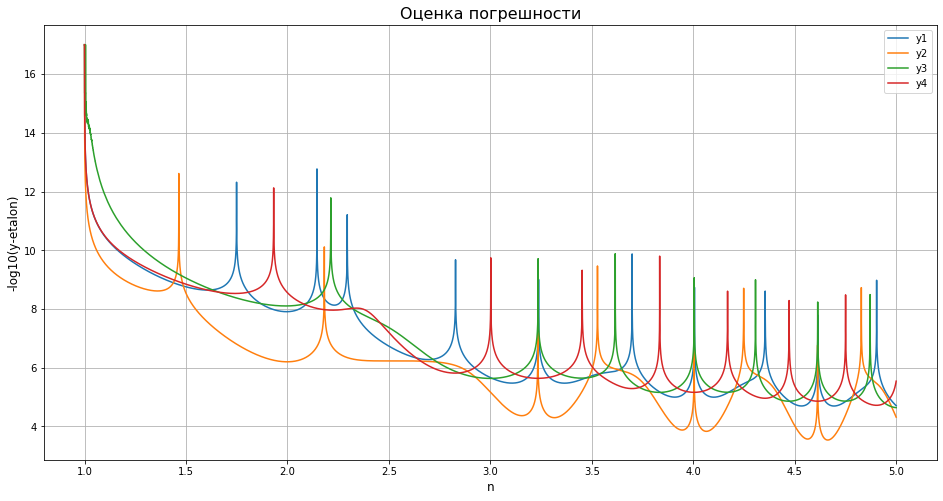

In [25]:
plot_loss(y1, y2, y3 ,y4, pos)

In [26]:
%%time
y1, y2, y3 ,y4, pos, hs = r_rk2(x_ab, 0.028, f1, f2, f3, f4, tol=1e-4, p=2, n=2)

Wall time: 27 s


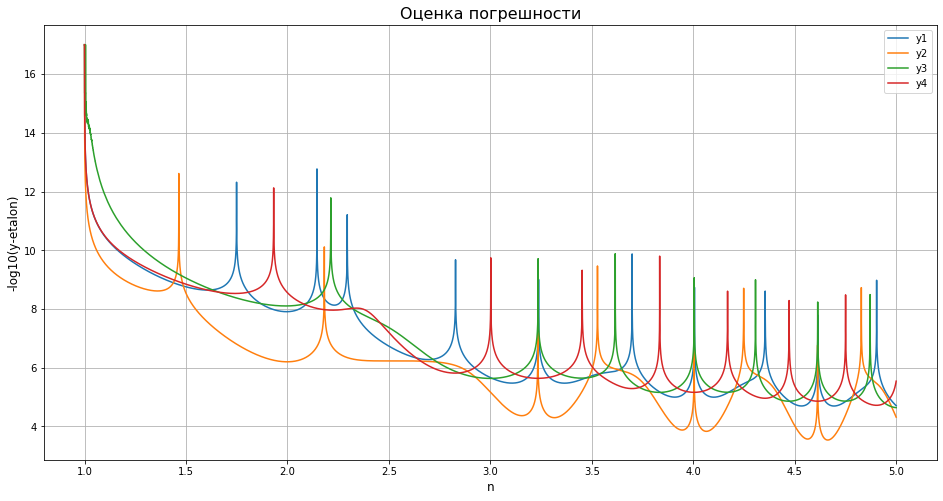

In [27]:
plot_loss(y1, y2, y3 ,y4, pos)

Text(0, 0.5, 'y')

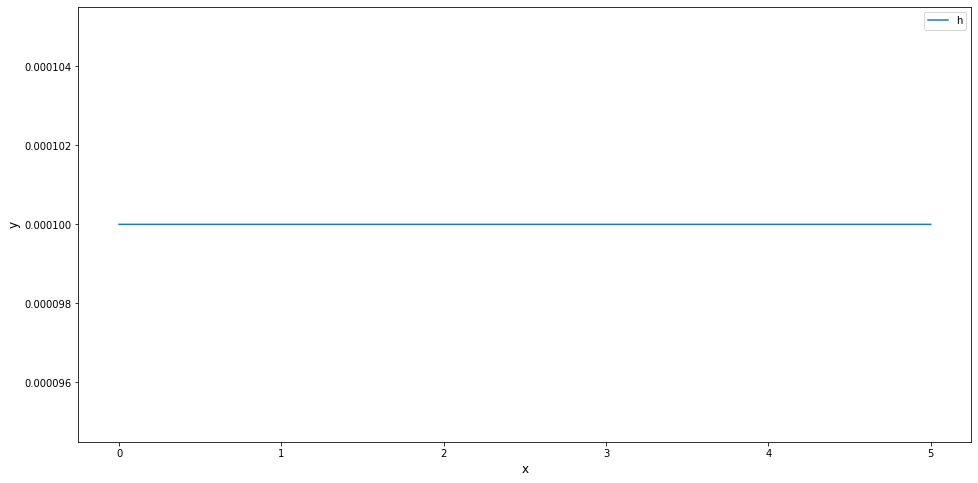

In [28]:
plt.figure(figsize=(16, 8))

plt.plot(pos[1:-1], hs[1:-1], label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

Изменения определенно есть, в случае 30 шагов для оценки локальной погрешности, точность получилась выше, но и возрасла вычислительная сложность. Метод отрабатывает за **33.7s** по сравнению с **2.13s** при 2 шагах

## Еще тесты

In [80]:
%%time
y1, y2, y3 ,y4, pos, hs= r_rk2(x_ab, 0.01, f1, f2, f3, f4, tol=1e-14, n=8)

Wall time: 56 s


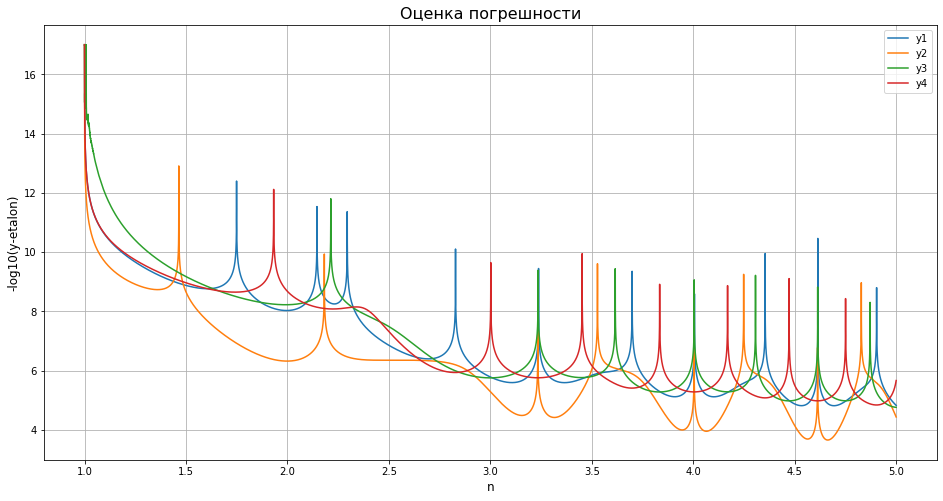

In [81]:
plot_loss(y1, y2, y3 ,y4, pos)

Text(0, 0.5, 'y')

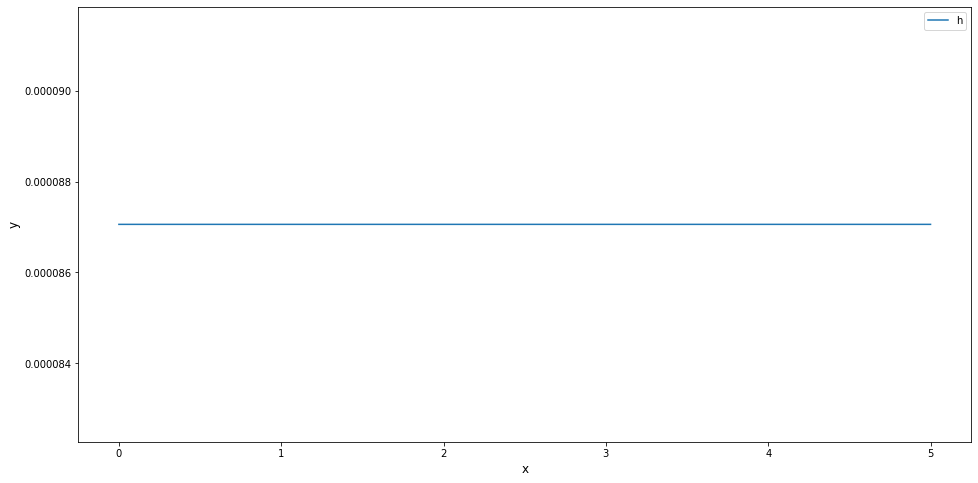

In [84]:
plt.figure(figsize=(16, 8))

plt.plot(pos[1:-1], hs[1:-1], label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

In [85]:
np.unique(hs)

array([4.09965278e-06, 8.70594077e-05, 1.00000000e-02])

In [86]:
%%time
y1, y2, y3 ,y4, pos, hs= r_rk2(x_ab, 0.01, f1, f2, f3, f4, tol=1e-15, n=8)

Wall time: 3min


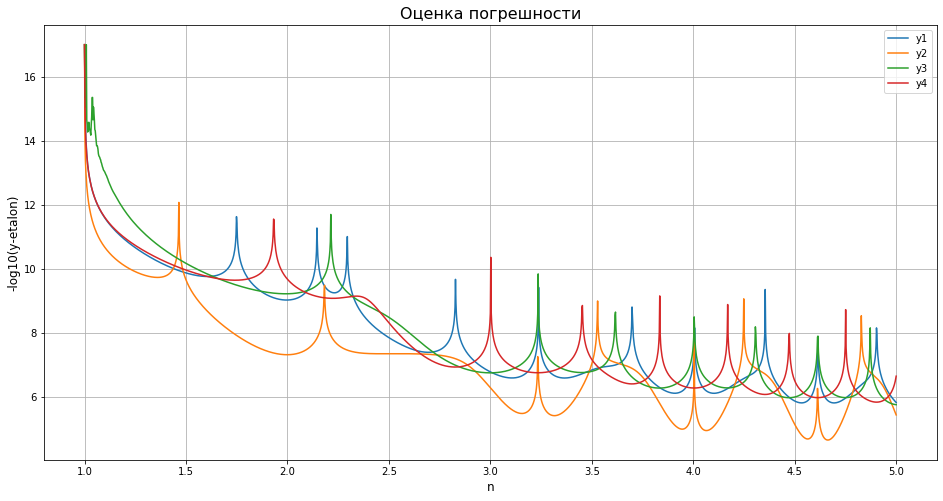

In [88]:
plot_loss(y1, y2, y3 ,y4, pos, skip=100)

In [89]:
np.unique(hs)

array([2.18846272e-06, 2.75306020e-05, 1.00000000e-02])

Text(0, 0.5, 'y')

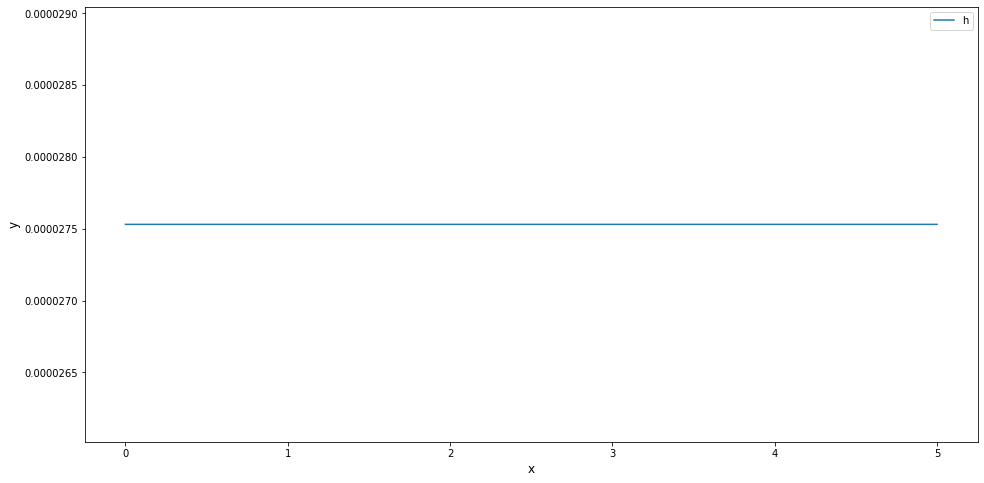

In [90]:
plt.figure(figsize=(16, 8))

plt.plot(pos[1:-1], hs[1:-1], label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

Метод все равно считатет с постоянным шагом

## Метод Рунге-Кутты третьего порядка

Реализуем метод третьего порядка. Расчетная схема будет выглядеть так:
\begin{equation*}
    \begin{cases}
        k_{11} = f_1(x, y_2, y_4) \\
        k_{21} = f_2(x, y_3, y_4) \\
        k_{31} = f_3(x, y_4) \\
        k_{41} = f_4(x, y_1) \\
    \end{cases}
\end{equation*} 
\begin{equation*}
    \begin{cases}
        k_{12} = f_1(x + (1/3)h, y_2 + (1/3)hk_{21}, y_4 + (1/3)hk_{41})   \\
        k_{22} = f_2(x + (1/3)h, y_3 + (1/3)hk_{31}, y_4 + (1/3)hk_{41})  \\
        k_{32} = f_3(x + (1/3)h, y_4 + (1/3)hk_{41})  \\
        k_{42} = f_4(x + (1/3)h, y_1 + (1/3)hk_{11})  \\
    \end{cases}
\end{equation*}

\begin{equation*}
    \begin{cases}
        k_{13} = f_1(x + (2/3)h, y_2 + (2/3)hk_{22}, y_4 + (2/3)hk_{42}) \cdot h \\
        k_{23} = f_2(x + (2/3)h, y_3 + (2/3)hk_{32}, y_4 + (2/3)hk_{42}) \cdot h \\
        k_{33} = f_3(x + (2/3)h, y_4 + (2/3)hk_{42}) \cdot h  \\
        k_{43} = f_4(x + (2/3)h, y_1 + (2/3)hk_{12}) \cdot h  \\
    \end{cases}
\end{equation*}

\begin{equation*}
    \begin{cases}
        y_1(x+h) = y_1(x) + (1/4)h\cdot k_{11} + (3/4)k_{13} \\
        y_2(x+h) = y_2(x) + (1/4)h\cdot k_{21} + (3/4)k_{23} \\
        y_3(x+h) = y_3(x) + (1/4)h\cdot k_{31} + (3/4)k_{33} \\
        y_4(x+h) = y_4(x) + (1/4)h\cdot k_{41} + (3/4)k_{43} \\
    \end{cases}
\end{equation*}

In [29]:
def runge_kutta3(x_ab, h, f1, f2, f3, f4):
    pos = np.arange(x_ab[0], x_ab[1] + h/2, h)
    p = 2 # порядок метода
    
    y1 = np.ones(len(pos)) # потом обобщить
    y2 = np.ones(len(pos))
    y3 = np.ones(len(pos))
    y4 = np.ones(len(pos))
    
    y3[0] = A
    sh = 0
    
    for i in range(len(pos) - 1): 
        k11 = f1(x_ab[0] + sh, y2[i], y4[i]) 
        k21 = f2(x_ab[0] + sh, y3[i], y4[i]) 
        k31 = f3(x_ab[0] + sh, y4[i]) 
        k41 = f4(x_ab[0] + sh, y1[i])
        
        k12 = f1(x_ab[0] + sh + (1/3) * h, y2[i] + (1/3) * k21 * h, y4[i] + (1/3) * k41 * h) # вот тут мб убрать sh?
        k22 = f2(x_ab[0] + sh + (1/3) * h, y3[i] + (1/3) * k31 * h, y4[i] + (1/3) * k41 * h) 
        k32 = f3(x_ab[0] + sh + (1/3) * h, y4[i] + (1/3) * k41 * h)
        k42 = f4(x_ab[0] + sh + (1/3) * h, y1[i] + (1/3) * k11 * h)
        
        k13 = f1(x_ab[0] + sh + (2/3) * h, y2[i] + (2/3) * k22 * h, y4[i] + (2/3) * k42 * h) * h 
        k23 = f2(x_ab[0] + sh + (2/3) * h, y3[i] + (2/3) * k32 * h, y4[i] + (2/3) * k42 * h) * h 
        k33 = f3(x_ab[0] + sh + (2/3) * h, y4[i] + (2/3) * k42 * h) * h 
        k43 = f4(x_ab[0] + sh + (2/3) * h, y1[i] + (2/3) * k12 * h) * h 
        
        sh += h # скорее всего не тут прибовлять
        
        y1[i + 1] = y1[i] + (1/4) * k11 * h + (3/4) * k13
        y2[i + 1] = y2[i] + (1/4) * k21 * h + (3/4) * k23
        y3[i + 1] = y3[i] + (1/4) * k31 * h + (3/4) * k33 
        y4[i + 1] = y4[i] + (1/4) * k41 * h + (3/4) * k43 
    
    return y1, y2, y3, y4

In [30]:
%%time
y11, y21, y31, y41 = runge_kutta3(x_ab, 0.001, f1, f2, f3, f4)

Wall time: 342 ms


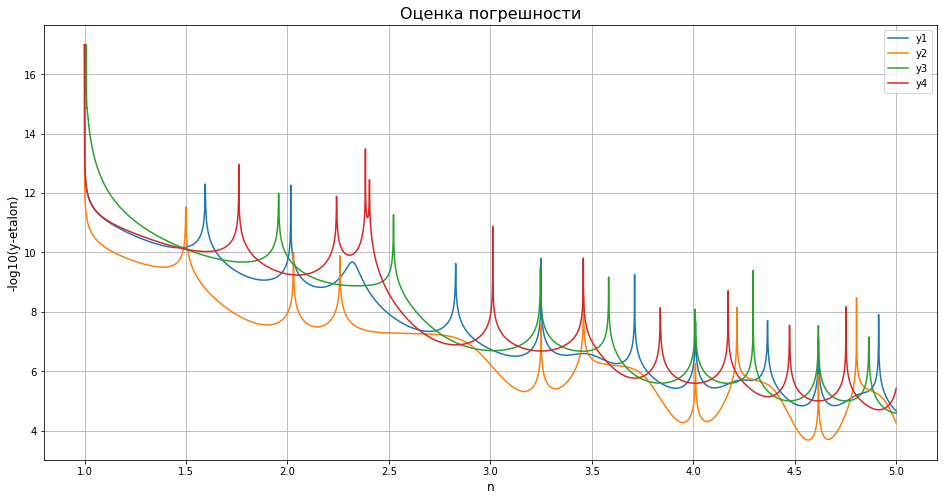

In [31]:
plot_loss(y11, y21, y31, y41)

При небольшом шаге дает неплохую точность. Попробуем увеличить шаг

In [32]:
%%time
y11, y21, y31, y41 = runge_kutta3(x_ab, 1e-5, f1, f2, f3, f4)

Wall time: 33.7 s


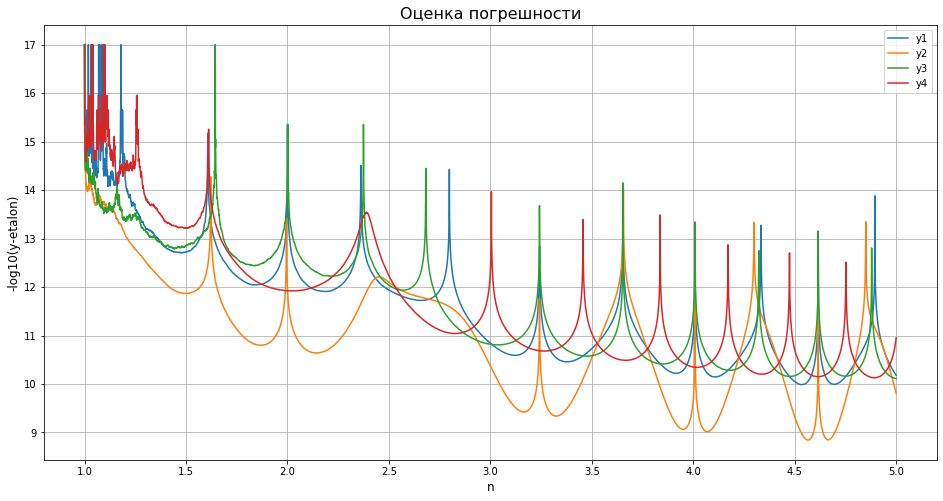

In [33]:
plot_loss(y11, y21, y31, y41, skip=100)

При увеличении шага до 1e-5 дает точность, намного выше той точности, которую метод второго порядка делал с шагом 1e-7, что и следовало ожидать, ведь порядок метода на единицу выше. Так же метод отработал намного быстрее. 27 секунд по сравнению с 23 минутами.

Сделаем оценку локальной погрешности и реализуем выбор шага на основе локальной погрешности

// Тут такая же ошибка как и для Рунге-Кутты 2 порядка. Похоже на какую-то ошибку в логике работы программы

In [132]:
def local_runge3(x_ab, h, f1, f2, f3, f4, tol=0.001, L=2, p=3, n=4, h_max=1e-4): # n- количество шагов на которых мы считаем.
    h = 1e-4
    y_n1, y_n2, y_n3, y_n4 = runge_kutta3([x_ab[0], x_ab[0] + n * h], h, f1, f2, f3, f4)
    y_2n1, y_2n2, y_2n3, y_2n4 = runge_kutta3([x_ab[0], x_ab[0] + n * h], h / L, f1, f2, f3, f4)
    
    y_n = np.array([y_n1[-1], y_n2[-1], y_n3[-1], y_n4[-1]])
    y_2n = np.array([y_2n1[-1], y_2n2[-1], y_2n3[-1], y_2n4[-1]])
    
    R1 = (y_2n - y_n) / (1 - 2 ** (-p))
    R2 = (y_2n - y_n) / (2 ** p - 1)
    
    h_tol = h * (tol / np.linalg.norm(R1)) ** (1 / p)
    
    return np.min([h_tol, h_max]), R1, R2

In [119]:
local_runge3([0, 5], 0.1, f1, f2, f3, f4, tol=1e-5)

(0.2507317159883425,
 array([ 2.53765263e-16,  2.53765263e-16, -5.07530526e-16, -1.26882631e-16]),
 array([ 3.17206578e-17,  3.17206578e-17, -6.34413157e-17, -1.58603289e-17]))

In [121]:
local_runge3([1, 5], 0.1, f1, f2, f3, f4, tol=1e-5)

(0.21855133572740612,
 array([ 5.07530526e-16,  0.00000000e+00, -5.07530526e-16, -6.34413157e-16]),
 array([ 6.34413157e-17,  0.00000000e+00, -6.34413157e-17, -7.93016446e-17]))

In [120]:
local_runge3([2, 5], 0.1, f1, f2, f3, f4, tol=1e-5)

(0.08339520022800688,
 array([ 2.03012210e-15, -1.52259158e-14,  5.07530526e-15, -5.96348368e-15]),
 array([ 2.53765263e-16, -1.90323947e-15,  6.34413157e-16, -7.45435459e-16]))

In [133]:
def r_rk3(x_ab, h, f1, f2, f3, f4, tol=0.01, L=2, p=3, n=4, hm=1e-3):
    # Нам нужно будет возращать и сетку по которой мы считали.
    y1 = [1]# потом обобщить
    y2 = [1]
    y3 = [A]
    y4 = [1]
    hs = [h]
    # h = first_step(x_ab, f1, f2, f3, f4, eps, p)
    
    pos = [x_ab[0]]
    i = 0
    h_tol = h
    while pos[-1] < x_ab[1]: # пока мы не дошли до конца
        h_tol, _, _ = local_runge3([pos[-1], x_ab[1]], h_tol, f1, f2, f3, f4, tol=tol, L=L, p=p, n=n, h_max=hm) # вот сюда поставить h
        
        if pos[-1] + h_tol > x_ab[1]: # чтобы попасть точно в конце промежутка.
            h_tol = x_ab[1] - pos[-1]
        
        k11 = f1(pos[-1], y2[i], y4[i]) 
        k21 = f2(pos[-1], y3[i], y4[i]) 
        k31 = f3(pos[-1], y4[i]) 
        k41 = f4(pos[-1], y1[i]) 
        
        k12 = f1(pos[-1] + (1/3) * h_tol, y2[i] + (1/3) * k21 * h_tol, y4[i] + (1/3) * k41 * h_tol)
        k22 = f2(pos[-1] + (1/3) * h_tol, y3[i] + (1/3) * k31 * h_tol, y4[i] + (1/3) * k41 * h_tol) 
        k32 = f3(pos[-1] + (1/3) * h_tol, y4[i] + (1/3) * k41 * h_tol)
        k42 = f4(pos[-1] + (1/3) * h_tol, y1[i] + (1/3) * k11 * h_tol)
        
        k13 = f1(pos[-1] + (2/3) * h_tol, y2[i] + (2/3) * k22 * h, y4[i] + (2/3) * k42 * h_tol) * h_tol 
        k23 = f2(pos[-1] + (2/3) * h_tol, y3[i] + (2/3) * k32 * h, y4[i] + (2/3) * k42 * h_tol) * h_tol 
        k33 = f3(pos[-1] + (2/3) * h_tol, y4[i] + (2/3) * k42 * h) * h_tol 
        k43 = f4(pos[-1] + (2/3) * h_tol, y1[i] + (2/3) * k12 * h) * h_tol 

        y1.append(y1[i] + (1/4) * k11 * h_tol + (3/4) * k13)  
        y2.append(y2[i] + (1/4) * k21 * h_tol + (3/4) * k23)
        y3.append(y3[i] + (1/4) * k31 * h_tol + (3/4) * k33)
        y4.append(y4[i] + (1/4) * k41 * h_tol + (3/4) * k43) 
        pos.append(pos[-1] + h_tol)
        hs.append(h_tol)
        i += 1 # по факту не нужна, можно -1 везде поставить
    
    return y1, y2, y3, y4, np.array(pos), hs

In [36]:
%%time
y1, y2, y3, y4, pos, h = r_rk3(x_ab, 1e-3, f1, f2, f3, f4, tol=1e-10, p=3, n=20)  # не забыть поменять порядок p

Wall time: 13.8 s


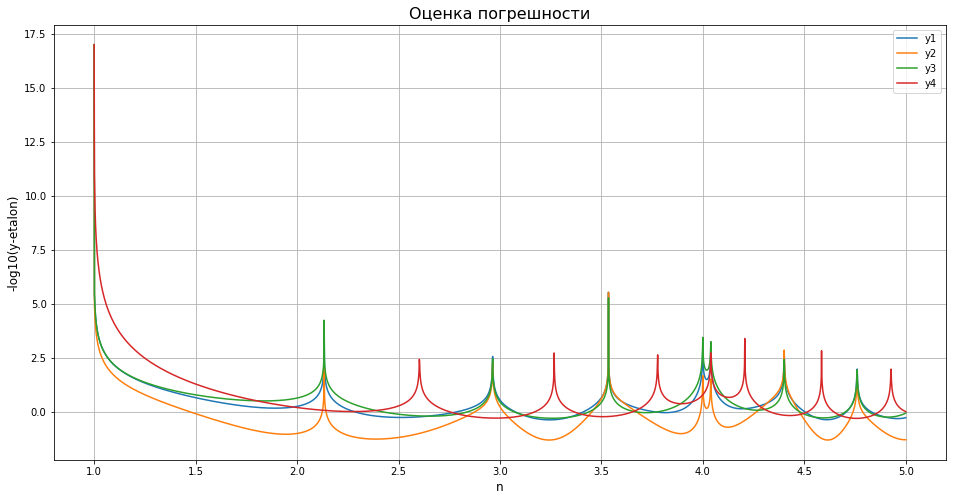

In [37]:
plot_loss(y1, y2, y3, y4, pos)

In [38]:
np.mean(h)

0.0017702654867256648

Text(0, 0.5, 'y')

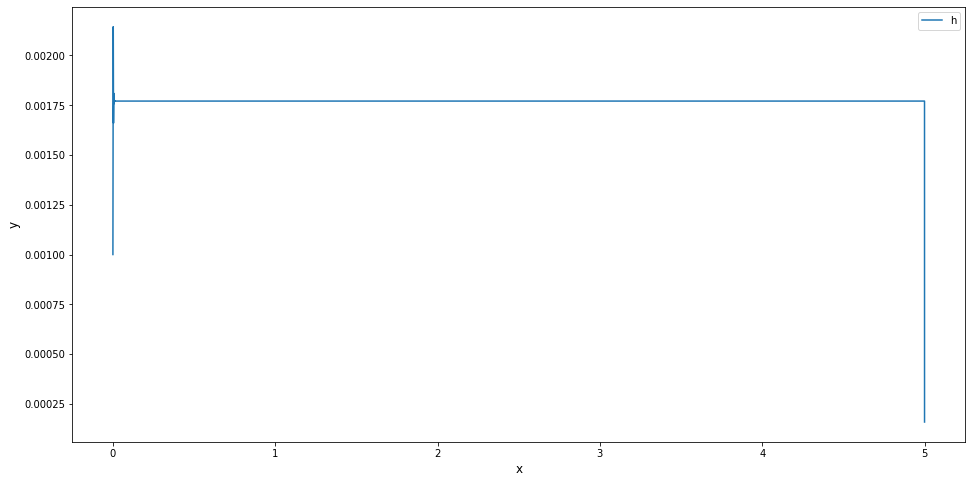

In [39]:
plt.figure(figsize=(16, 8))

plt.plot(pos, h, label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

## Еще тесты   
С постоянным шагом при оценке локальной погрешности

In [102]:
%%time
y1, y2, y3, y4, pos, h = r_rk3(x_ab, 1e-3, f1, f2, f3, f4, tol=1e-15, p=3, n=4)  # не забыть поменять порядок p

Wall time: 33.7 s


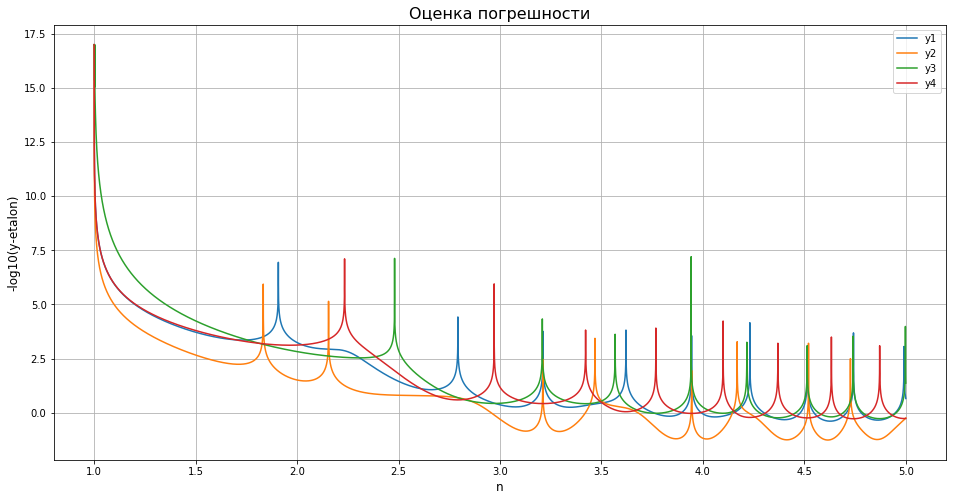

In [104]:
plot_loss(y1, y2, y3, y4, pos)

Text(0, 0.5, 'y')

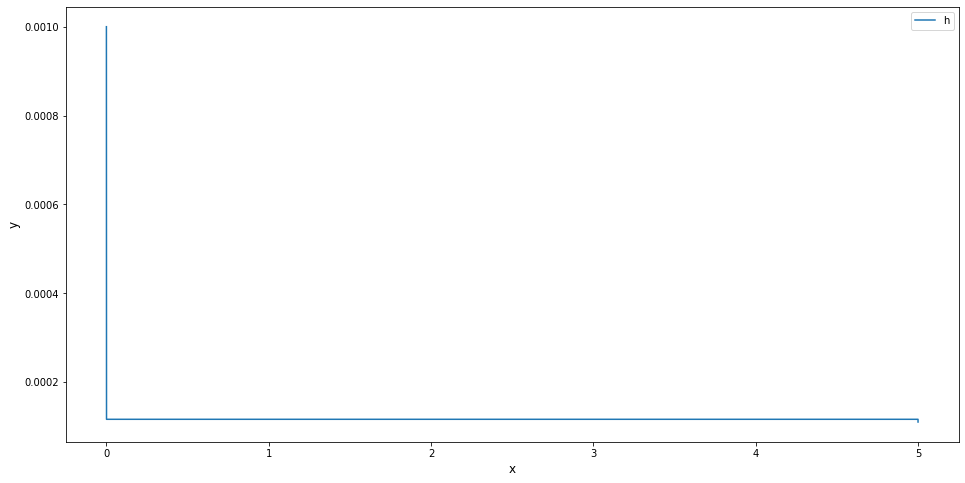

In [105]:
plt.figure(figsize=(16, 8))

plt.plot(pos, h, label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

In [106]:
np.unique(h)

array([0.00011022, 0.00011638, 0.001     ])

In [113]:
%%time
y1, y2, y3, y4, pos, h = r_rk3(x_ab, 1e-3, f1, f2, f3, f4, tol=1e-13, p=3, n=16)  # не забыть поменять порядок p

Wall time: 32.3 s


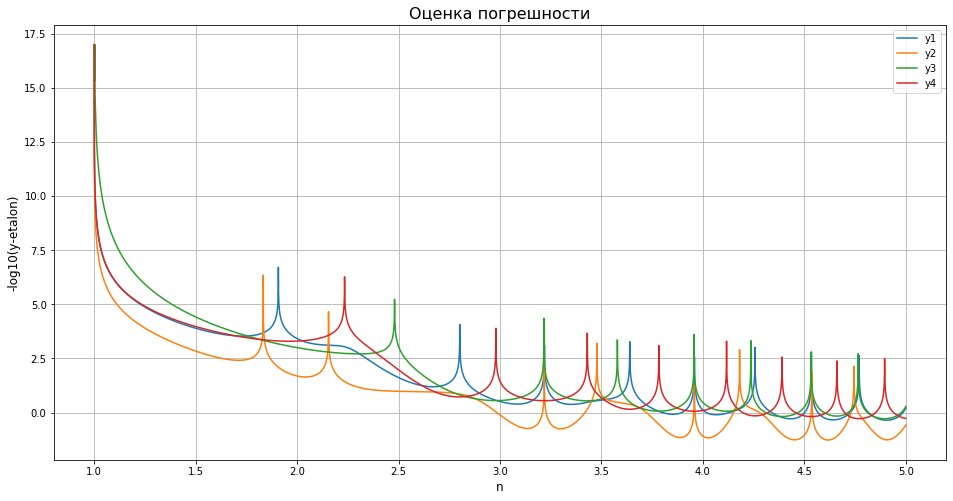

In [114]:
plot_loss(y1, y2, y3, y4, pos)

In [115]:
np.unique(h)

array([5.48749987e-06, 4.18269576e-04, 1.00000000e-03])

In [116]:
%%time
y1, y2, y3, y4, pos, h = r_rk3(x_ab, 1e-3, f1, f2, f3, f4, tol=1e-14, p=3, n=16)  # не забыть поменять порядок p

Wall time: 1min 11s


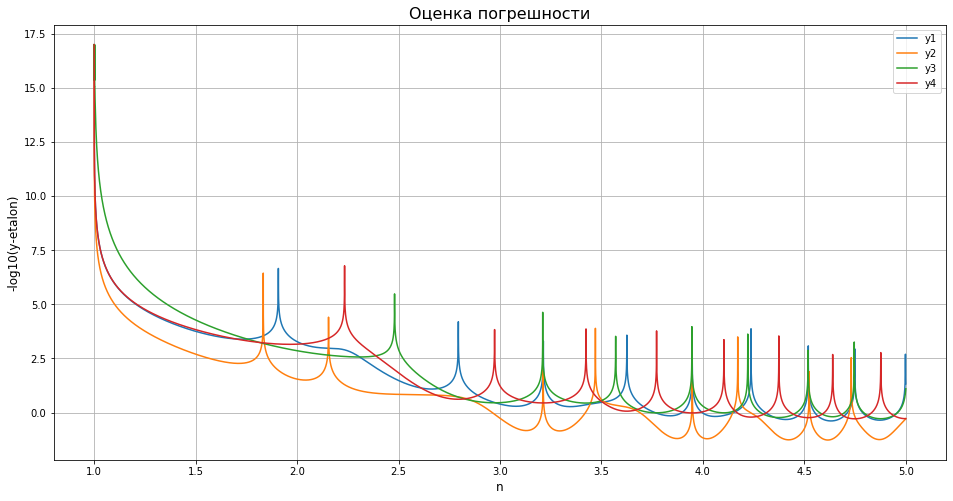

In [117]:
plot_loss(y1, y2, y3, y4, pos)

In [118]:
np.unique(h)

array([2.72868381e-05, 1.94143539e-04, 1.00000000e-03])

### Тест с постояннм шагом.

Рассмотрим пример без ограничения сверху

In [139]:
def local_runge3(x_ab, h, f1, f2, f3, f4, tol=0.001, L=2, p=3, n=4, h_max=1e-4): # n- количество шагов на которых мы считаем.
    h = 1e-4
    y_n1, y_n2, y_n3, y_n4 = runge_kutta3([x_ab[0], x_ab[0] + n * h], h, f1, f2, f3, f4)
    y_2n1, y_2n2, y_2n3, y_2n4 = runge_kutta3([x_ab[0], x_ab[0] + n * h], h / L, f1, f2, f3, f4)
    
    y_n = np.array([y_n1[-1], y_n2[-1], y_n3[-1], y_n4[-1]])
    y_2n = np.array([y_2n1[-1], y_2n2[-1], y_2n3[-1], y_2n4[-1]])
    
    R1 = (y_2n - y_n) / (1 - 2 ** (-p))
    R2 = (y_2n - y_n) / (2 ** p - 1)
    
    h_tol = h * (tol / np.linalg.norm(R1)) ** (1 / p)
    
    return h_tol, R1, R2

In [140]:
%%time
y1, y2, y3, y4, pos, h = r_rk3(x_ab, 1e-3, f1, f2, f3, f4, tol=1e-13, p=3, n=4)  # не забыть поменять порядок p

Wall time: 428 ms


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


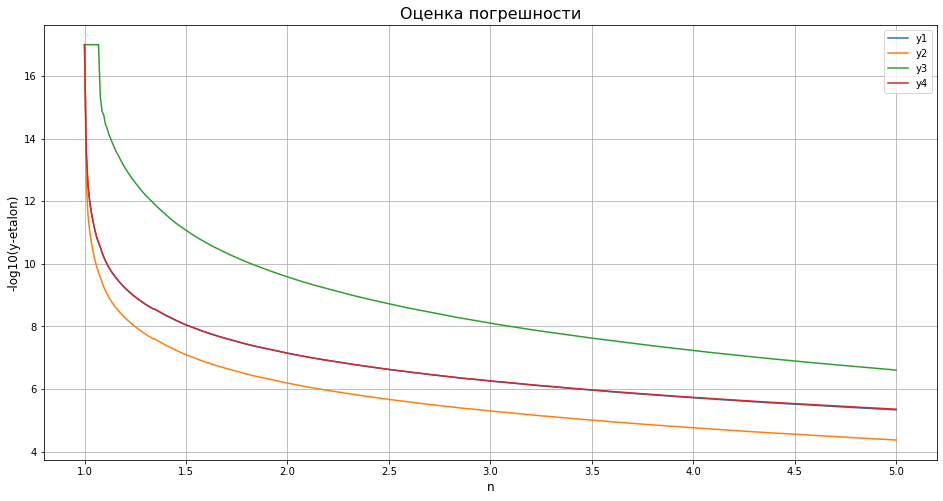

In [141]:
plot_loss(y1, y2, y3, y4, pos)

Хорошие результаты. Такое мы и ожидали увидеть, график без скачков. Посмотрим как менялся шаг.

Text(0, 0.5, 'y')

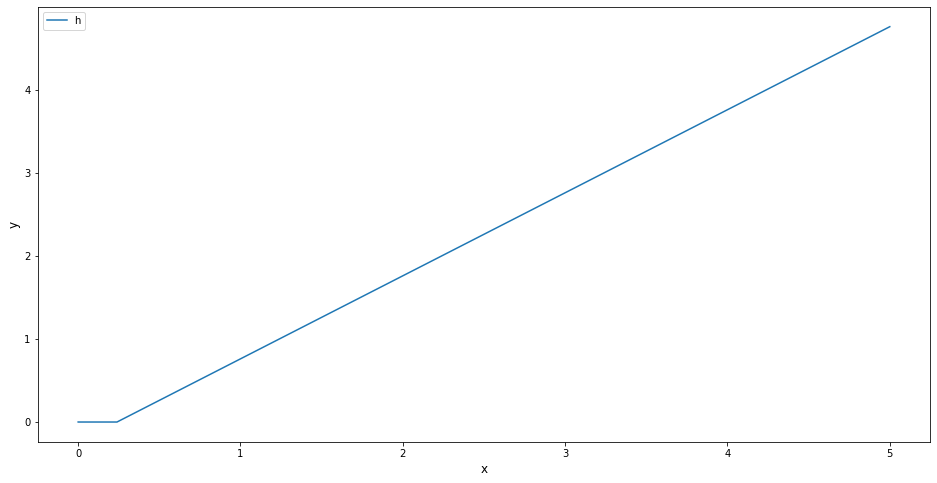

In [142]:
plt.figure(figsize=(16, 8))

plt.plot(pos, h, label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

Видим огромный шаг в конце. Выведем его

In [144]:
h[-1]

4.760802112966813

Посмотрим как ведут себя остальные шаги

Text(0, 0.5, 'y')

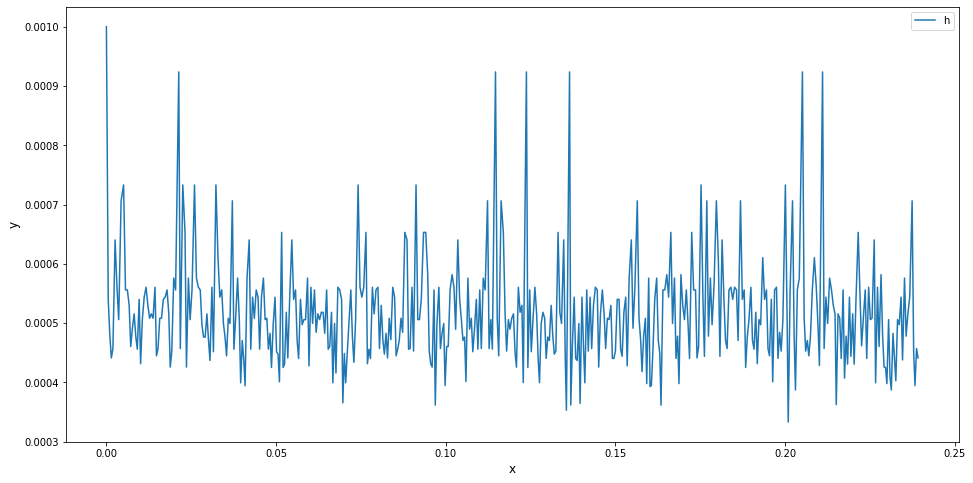

In [143]:
plt.figure(figsize=(16, 8))

plt.plot(pos[:-1], h[:-1], label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

Как и ожидалось, шаг меняется в зависимости от угла наклона нашей функции. Интересно, что в какой-то момент он совершает огромный скачок сразу в конец отрезка

Попробуем ограничить сверху максимально допустимый шаг

In [145]:
def local_runge3(x_ab, h, f1, f2, f3, f4, tol=0.001, L=2, p=3, n=4, h_max=1e-4): # n- количество шагов на которых мы считаем.
    h = 1e-4
    y_n1, y_n2, y_n3, y_n4 = runge_kutta3([x_ab[0], x_ab[0] + n * h], h, f1, f2, f3, f4)
    y_2n1, y_2n2, y_2n3, y_2n4 = runge_kutta3([x_ab[0], x_ab[0] + n * h], h / L, f1, f2, f3, f4)
    
    y_n = np.array([y_n1[-1], y_n2[-1], y_n3[-1], y_n4[-1]])
    y_2n = np.array([y_2n1[-1], y_2n2[-1], y_2n3[-1], y_2n4[-1]])
    
    R1 = (y_2n - y_n) / (1 - 2 ** (-p))
    R2 = (y_2n - y_n) / (2 ** p - 1)
    
    h_tol = h * (tol / np.linalg.norm(R1)) ** (1 / p)
    
    return np.min([h_tol, h_max]), R1, R2

In [146]:
%%time
y1, y2, y3, y4, pos, h = r_rk3(x_ab, 1e-3, f1, f2, f3, f4, tol=1e-13, p=3, n=4)  # не забыть поменять порядок p

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


Wall time: 43.8 s


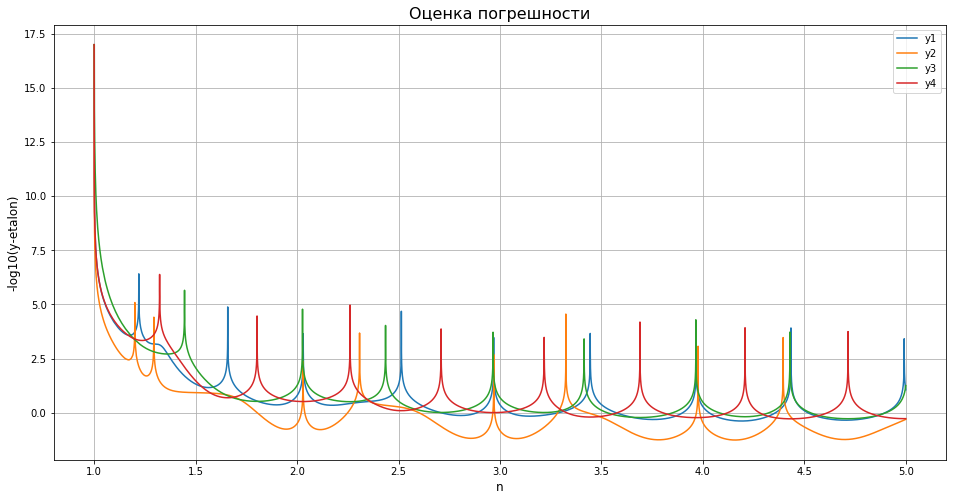

In [147]:
plot_loss(y1, y2, y3, y4, pos)

Странно, в какой-то момент все ломается. Посмотрим на шаг

Text(0, 0.5, 'y')

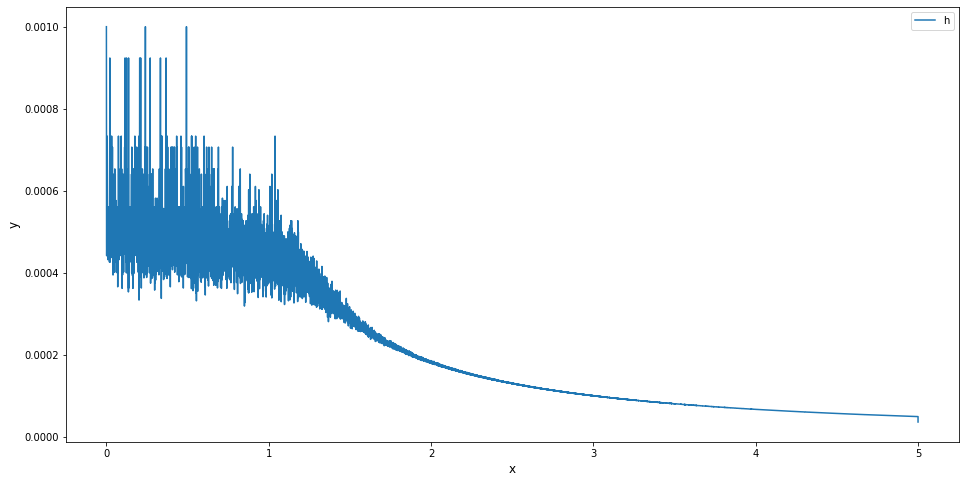

In [148]:
plt.figure(figsize=(16, 8))

plt.plot(pos, h, label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

Видим, что было несколько попыток выпрыгнуть за допустимую точность.

### Тест с переменным шагом.

Без ограничения сверху

In [149]:
def local_runge3(x_ab, h, f1, f2, f3, f4, tol=0.001, L=2, p=3, n=4, h_max=1e-4): # n- количество шагов на которых мы считаем.
    # h = 1e-4
    y_n1, y_n2, y_n3, y_n4 = runge_kutta3([x_ab[0], x_ab[0] + n * h], h, f1, f2, f3, f4)
    y_2n1, y_2n2, y_2n3, y_2n4 = runge_kutta3([x_ab[0], x_ab[0] + n * h], h / L, f1, f2, f3, f4)
    
    y_n = np.array([y_n1[-1], y_n2[-1], y_n3[-1], y_n4[-1]])
    y_2n = np.array([y_2n1[-1], y_2n2[-1], y_2n3[-1], y_2n4[-1]])
    
    R1 = (y_2n - y_n) / (1 - 2 ** (-p))
    R2 = (y_2n - y_n) / (2 ** p - 1)
    
    h_tol = h * (tol / np.linalg.norm(R1)) ** (1 / p)
    
    return h_tol, R1, R2

In [150]:
%%time
y1, y2, y3, y4, pos, h = r_rk3(x_ab, 1e-3, f1, f2, f3, f4, tol=1e-13, p=3, n=4)  # не забыть поменять порядок p

Wall time: 37.3 s


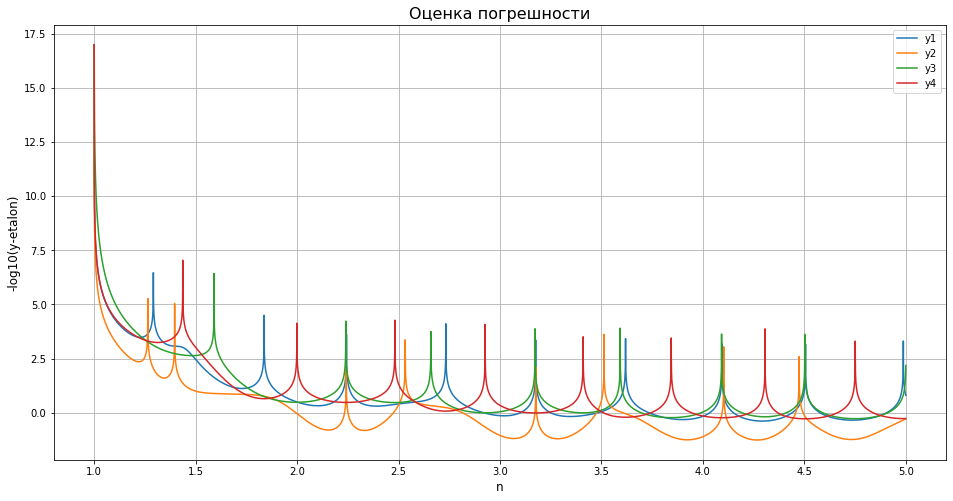

In [151]:
plot_loss(y1, y2, y3, y4, pos)

Text(0, 0.5, 'y')

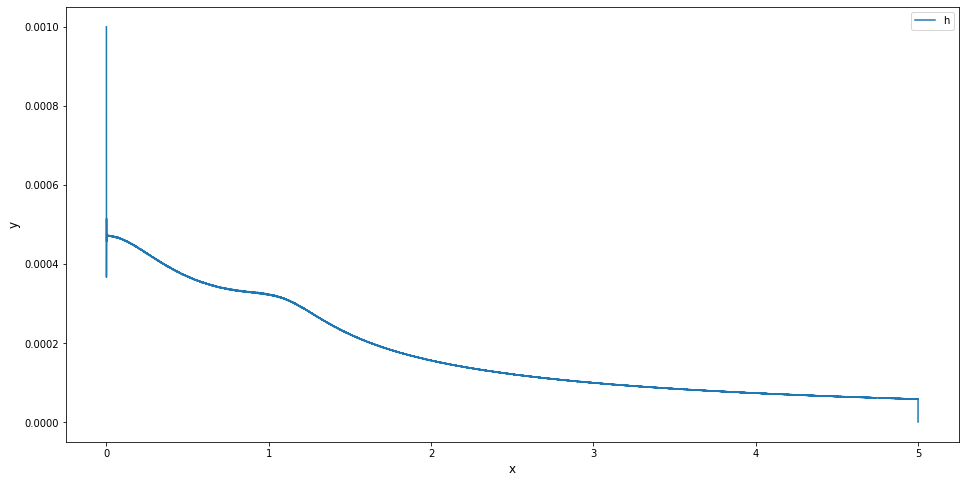

In [152]:
plt.figure(figsize=(16, 8))

plt.plot(pos, h, label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

Выглядит неплохо, но не дает нужных результатов. Шаг уменьшается, хотя должен колебаться в зависимости от степени "крутости" нашей фунции. 

Тут даже можно не смотреть на ограничение шага, ведь функция даже не пытается где-то сделать огромный шаг

### Мысли  
Пока что лучше всего выглядит вариант где мы оцениваем погрешность с постоянным заданным заранее шагом, и без ограничения сверху. Только этот метод дал нужный результат, хотя не до конца понятно как так получилось. Это можно было бы обьяснить если бы мы запоминали предыдущие оценки погрешностей и делали бы на их основе вывод. Тогда бы мы поняли как ведет себя функция и смогли бы пропустить ненужные приближения решения на всем промежутке и получить конечный ответ.

Еще раз. Допустим мы знаем, что функция квазипериодична / периодина. Мы накопили некоторую информацию, делая шаги и оценивая их погрешность. По этим данным мы можем оценить вероятность того, что сделав большой шаг, мы попадем в нужную епсилон окресность нашего ответа, и чем больше шагов мы сделали, тем большую увереность в этом мы имеем

## Еще немного тестов

Вернемся к варианту где мы не ограничиваем сверху шаг, а оценку делаем с постоянным шагом

In [158]:
def local_runge3(x_ab, h, f1, f2, f3, f4, tol=0.001, L=2, p=3, n=4, h_max=1e-4): # n- количество шагов на которых мы считаем.
    h = 1e-4
    y_n1, y_n2, y_n3, y_n4 = runge_kutta3([x_ab[0], x_ab[0] + n * h], h, f1, f2, f3, f4)
    y_2n1, y_2n2, y_2n3, y_2n4 = runge_kutta3([x_ab[0], x_ab[0] + n * h], h / L, f1, f2, f3, f4)
    
    y_n = np.array([y_n1[-1], y_n2[-1], y_n3[-1], y_n4[-1]])
    y_2n = np.array([y_2n1[-1], y_2n2[-1], y_2n3[-1], y_2n4[-1]])
    
    R1 = (y_2n - y_n) / (1 - 2 ** (-p))
    R2 = (y_2n - y_n) / (2 ** p - 1)
    
    h_tol = h * (tol / np.linalg.norm(R1)) ** (1 / p)
    
    return h_tol, R1, R2

In [163]:
%%time
y1, y2, y3, y4, pos, h = r_rk3(x_ab, 1e-3, f1, f2, f3, f4, tol=1e-16, p=3, n=4)  # не забыть поменять порядок p

Wall time: 149 ms


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


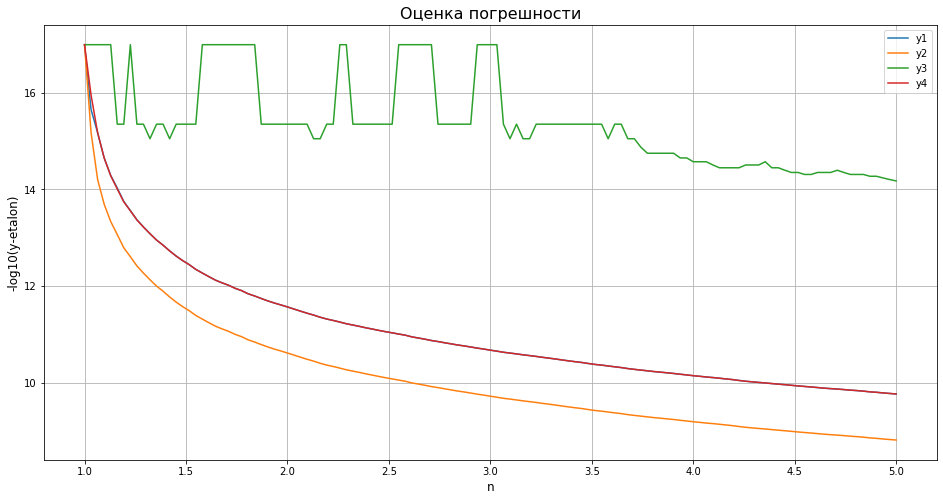

In [164]:
plot_loss(y1, y2, y3, y4, pos)

Text(0, 0.5, 'y')

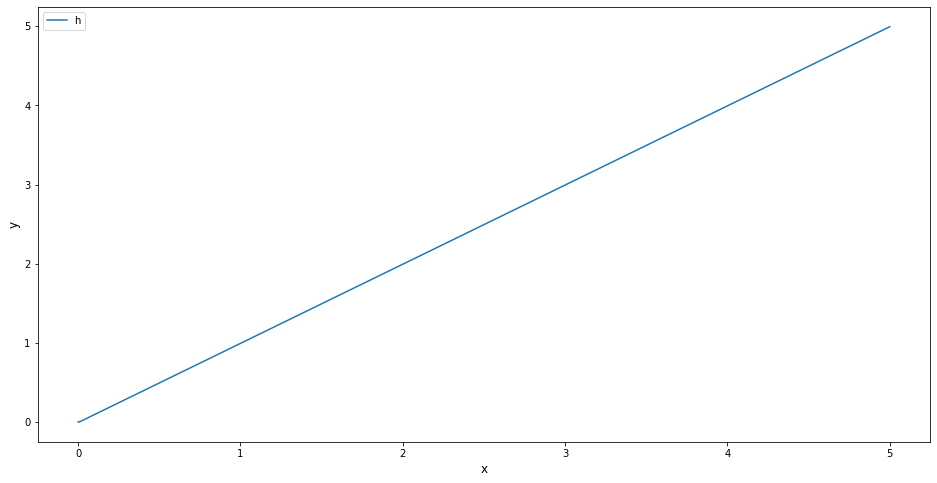

In [165]:
plt.figure(figsize=(16, 8))

plt.plot(pos, h, label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

Text(0, 0.5, 'y')

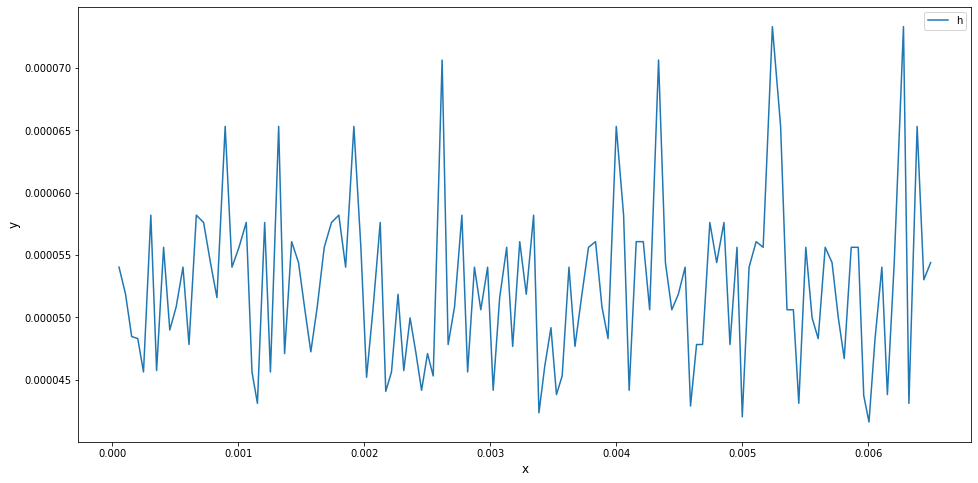

In [170]:
plt.figure(figsize=(16, 8))

plt.plot(pos[1:-1], h[1:-1], label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

In [166]:
h[-1]

4.993504255905621

In [161]:
%%time
y1, y2, y3, y4, pos, h = r_rk3(x_ab, 1e-3, f1, f2, f3, f4, tol=1e-15, p=3, n=4)  # не забыть поменять порядок p

Wall time: 994 ms


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


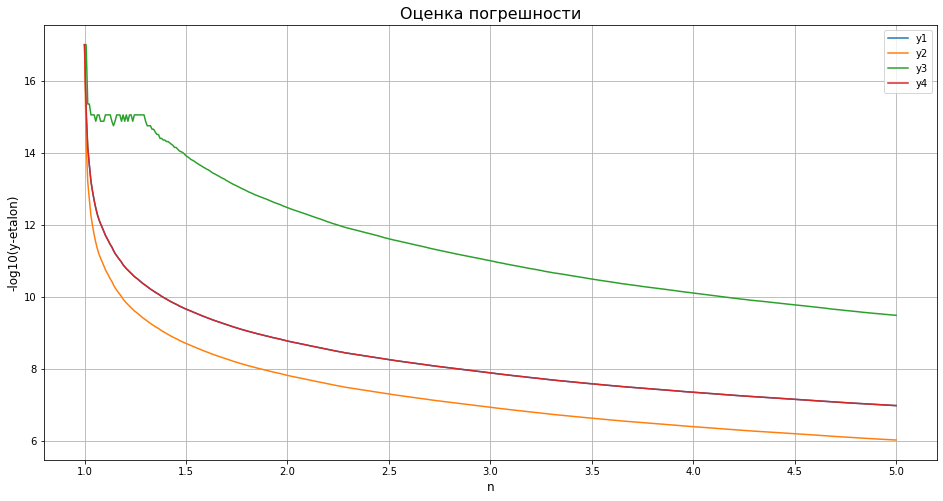

In [162]:
plot_loss(y1, y2, y3, y4, pos)

In [123]:
%%time
y1, y2, y3, y4, pos, h = r_rk3(x_ab, 1e-3, f1, f2, f3, f4, tol=1e-13, p=3, n=4)  # не забыть поменять порядок p

Wall time: 461 ms


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


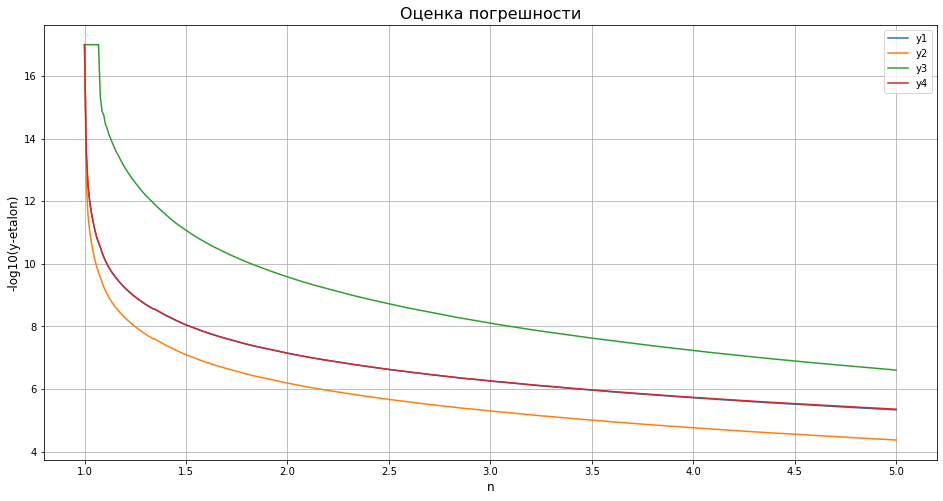

In [124]:
plot_loss(y1, y2, y3, y4, pos)

Text(0, 0.5, 'y')

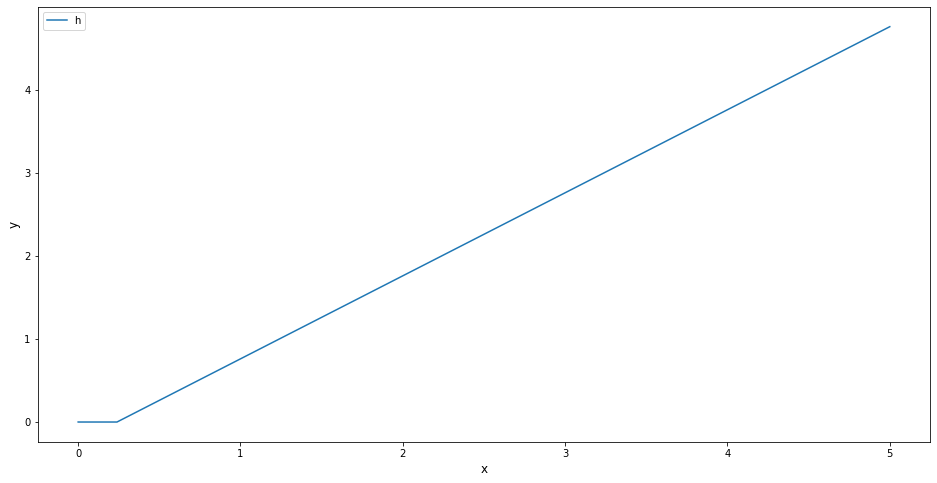

In [125]:
plt.figure(figsize=(16, 8))

plt.plot(pos, h, label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

In [137]:
%%time
y1, y2, y3, y4, pos, h = r_rk3(x_ab, 1e-3, f1, f2, f3, f4, tol=1e-13, p=3, n=4, hm=1e-2)  # не забыть поменять порядок p

Wall time: 558 ms


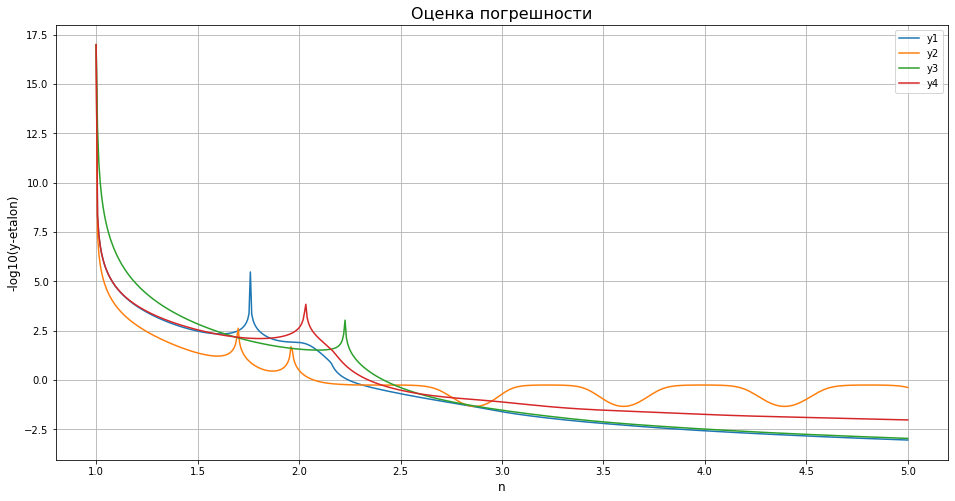

In [138]:
plot_loss(y1, y2, y3, y4, pos)

Text(0, 0.5, 'y')

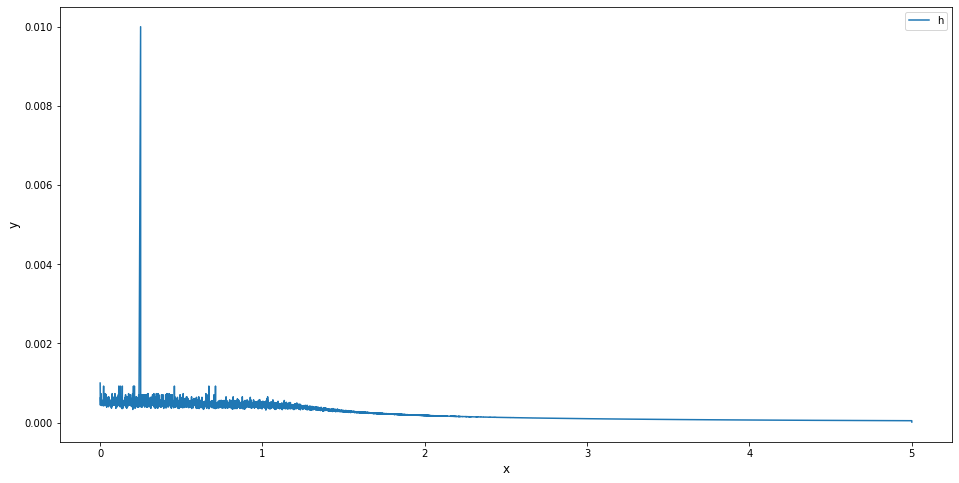

In [136]:
plt.figure(figsize=(16, 8))

plt.plot(pos, h, label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

В какой-то момент мы он хочет прыгнуть очен высоко. Примерно на том же моменте, где мы не ставили ограничение на шаг

## Алгоритм удвоения и деления шага пополам

### Алгоритм выбора начального шага

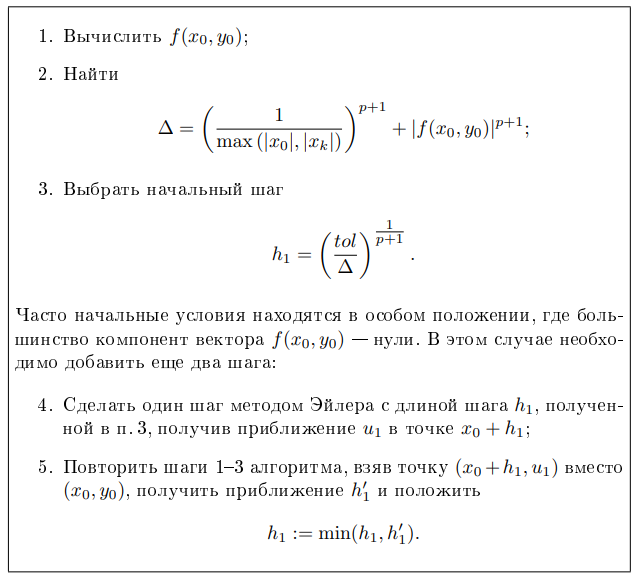

In [40]:
def first_step(x_ab, f1, f2, f3, f4, tol=0.001, p=2):
    # алгоритм выбора начального шага
    y1 = [1]# потом обобщить
    y2 = [1]
    y3 = [A]
    y4 = [1]
    
    pos = [x_ab[0]]
    i = 0
    
    def opt_h1(x, y_1, y_2, y_3, y_4): # пункты 1-3
        f10 = f1(x[0], y_2, y_4)  # вычисляем f(x0, y0)
        f20 = f2(x[0], y_3, y_4) 
        f30 = f3(x[0], y_4) 
        f40 = f4(x[0], y_1) 

        delta = ((1 / np.max([np.abs(x[0]), np.abs(x[1])]) ** (p+1) 
                 + np.linalg.norm([f10, f20, f30, f40]) ** (p+1)))   # вот тут не понятно, что такое xk
        
        h1 = (tol / delta) ** (1 / (p + 1)) ** (1 / p)
        return h1
    
    h_new = opt_h1(x_ab, y1[0], y2[0], y3[0], y4[0])
    
    # делаем шаг методом эйлера
    x_new = x_ab[0] + h_new # нормально что в max мы выбираем конец промежутка, а тут шагаем от начала?
    y1_1 = y1[0] + h_new * f1(x_ab[0], y2[0], y4[0])  # вычисляем f(x0, y0)
    y2_1 = y2[0] + h_new * f2(x_ab[0], y3[0], y4[0]) 
    y3_1 = y3[0] + h_new * f3(x_ab[0], y4[0]) 
    y4_1 = y4[0] + h_new * f4(x_ab[0], y1[0]) 
    
    h1 = opt_h1([x_new, x_ab[1]], y1_1, y2_1, y3_1, y4_1) # начальный шаг получается очень большой, на мой вз
    return h1

### Алгоритм удвоения и деления шага пополам

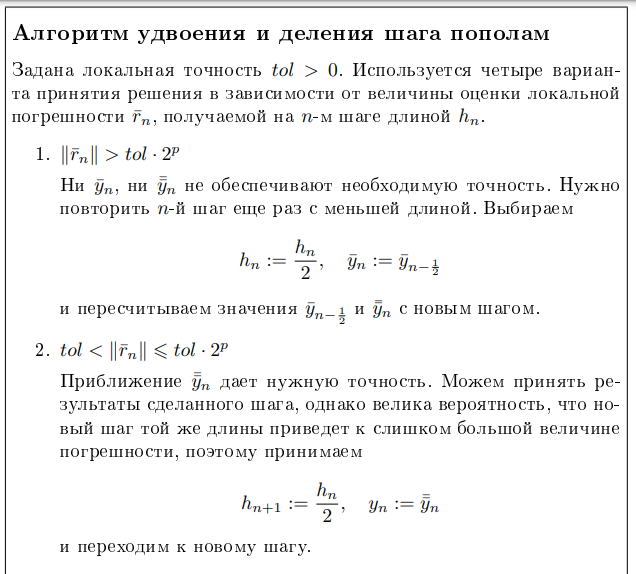

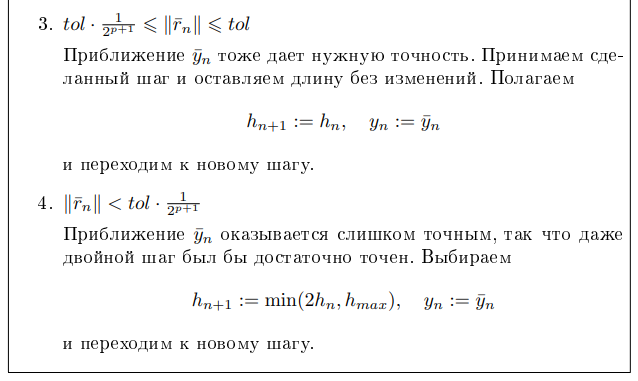

In [41]:
def check(x_ab, h1, f1, f2, f3, f4, tol=0.001, L=2, p=2, n=4):
    y_n1, y_n2, y_n3, y_n4 = runge_kutta2([x_ab[0], x_ab[0] + n * h1], h1, f1, f2, f3, f4)  # вычислели значения в двух сетках
    y_2n1, y_2n2, y_2n3, y_2n4 = runge_kutta2([x_ab[0], x_ab[0] + n * h1], h1 / L, f1, f2, f3, f4)
    
    y_n = np.array([y_n1[-1], y_n2[-1], y_n3[-1], y_n4[-1]])  # оцениваем погрешность
    y_2n = np.array([y_2n1[-1], y_2n2[-1], y_2n3[-1], y_2n4[-1]])
    R1 = np.linalg.norm((y_2n - y_n) / (1 - 2 ** (-p)))  # сразу вычисляем норму погрешности
    R2 = np.linalg.norm((y_2n - y_n) / (2 ** p - 1))
    return R1, R2, np.array([y_n1, y_n2, y_n3, y_n4]), np.array([y_2n1, y_2n2, y_2n3, y_2n4])

In [42]:
def step(x_ab, h1, f1, f2, f3, f4, tol=0.001, L=2, p=2, n=4, h_max = 1e-3):
    R1, R2, y_ns, y_2ns = check(x_ab, h1, f1, f2, f3, f4, tol, L, p, n)
    # далее идут случаи
    if R1 > tol * 2 ** p:
        return step(x_ab, h1 / 2, f1, f2, f3, f4, tol, L, p, n)
    elif tol < R1 <= tol * 2 ** p:
        h = h1 / 2
        return y_2ns[0][1], y_2ns[1][1], y_2ns[2][1], y_2ns[3][1], h, 1
    elif tol * (1 / 2**(p + 1)) <= R1 <= tol:
        return y_ns[0][1], y_ns[1][1], y_ns[2][1], y_ns[3][1], h1, 2
    else:
        h = np.min([2*h1, h_max])
        return y_ns[0][1], y_ns[1][1], y_ns[2][1], y_ns[3][1], h, 3   

In [43]:
def solve_ode(x_ab, f1, f2, f3, f4, tol=0.001, L=2, p=2, n=4):
    h1 = first_step(x_ab, f1, f2, f3, f4, tol, p)
    nums = []
    y1 = [1]# потом обобщить
    y2 = [1]
    y3 = [A]
    y4 = [1]
    hs = [h1]
    
    pos = [x_ab[0]]
    i = 0
    
    while pos[-1] < x_ab[1]: # дописать, чтобы заканчивался на 5
        y_1, y_2, y_3, y_4, h, num = step([pos[-1], x_ab[1]], hs[-1], f1, f2, f3, f4, tol, L, p, n) 
        y1.append(y_1)
        y2.append(y_2)
        y3.append(y_3)
        y4.append(y_4)
        hs.append(h)
        pos.append(pos[-1] + h)
        nums.append(num)
    return y1, y2, y3, y4, np.array(pos), hs, nums

In [44]:
%%time
y1, y2, y3, y4, pos, hs, n = solve_ode(x_ab, f1, f2, f3, f4, 1e-10)

Wall time: 1min 44s


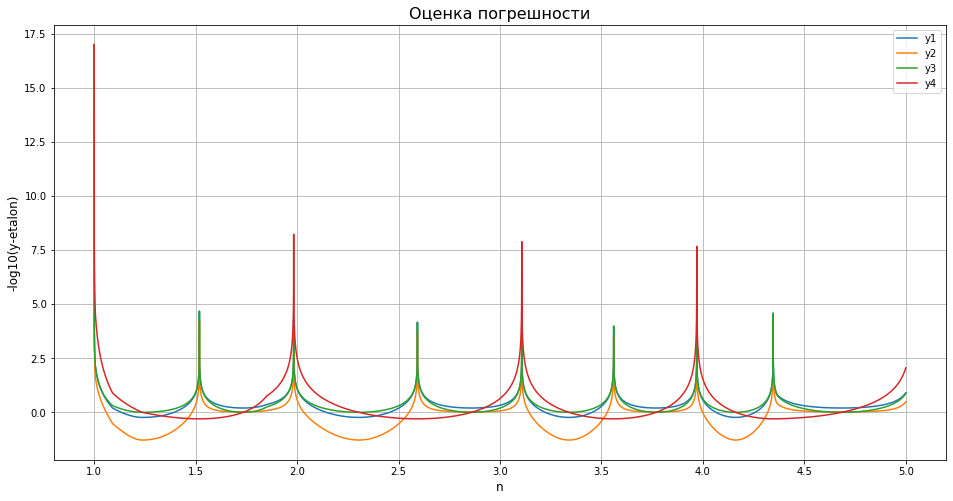

In [45]:
plot_loss(y1, y2, y3, y4, pos)

Желаемых результатов мы не получили

Text(0, 0.5, 'y')

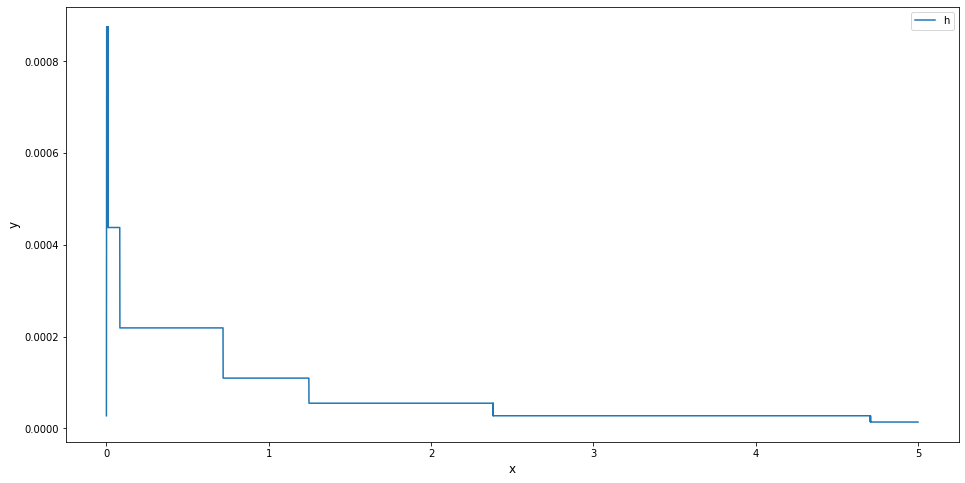

In [46]:
plt.figure(figsize=(16, 8))

plt.plot(pos, hs, label='h')

plt.legend(loc='best')

plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

Посмотрим какие шаги сколько раз срабатывали

In [47]:
np.unique(n, return_counts=True)

(array([1, 2, 3]), array([    64, 134910,     63], dtype=int64))